In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
df = pd.read_excel('Airline client data V0.xlsx')

# Data cleaning and EDA

Exploring the data frame format and info.

In [3]:
df.head()

,PASSENGER_ID,BOOKING_DATE,FLIGHT_NUMBER,FLIGHT_DEPARTURE_DATE,PASSENGER_ZIP_CODE,PASSENGER_COUNTRY_CODE,AGE,BOOKING_TRAVEL_AGENCY_ZIP_CODE,AIR_FLIGHT_COMPANY_NAME,GENDER_CODE,PROFIT (AUD)
0,290344686,2012-01-01,SA,2013-01-13,2075,AUS,55.0,2022,A,M,2909.7927
1,247630864,2012-01-01,WB,2013-05-04,4118,AUS,48.0,2060,A,F,1119.9226
2,491321871,2012-01-01,SA,2013-01-13,2232,AUS,53.0,2060,A,F,2447.9628
3,443821994,2012-01-01,SA,2013-01-05,2171,AUS,52.0,2606,A,M,1088.3543
4,476584402,2012-01-01,SA,2013-01-05,2171,AUS,18.0,2606,A,M,739.8303


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48154 entries, 0 to 48153
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   PASSENGER_ID                    48154 non-null  int64         
 1   BOOKING_DATE                    48154 non-null  datetime64[ns]
 2   FLIGHT_NUMBER                   48154 non-null  object        
 3   FLIGHT_DEPARTURE_DATE           48154 non-null  datetime64[ns]
 4   PASSENGER_ZIP_CODE              48147 non-null  object        
 5   PASSENGER_COUNTRY_CODE          48154 non-null  object        
 6   AGE                             48153 non-null  float64       
 7   BOOKING_TRAVEL_AGENCY_ZIP_CODE  48153 non-null  object        
 8   AIR_FLIGHT_COMPANY_NAME         48154 non-null  object        
 9   GENDER_CODE                     48153 non-null  object        
 10  PROFIT (AUD)                    48154 non-null  float64       
dtypes:

In [5]:
df.describe()

,PASSENGER_ID,BOOKING_DATE,FLIGHT_DEPARTURE_DATE,AGE,PROFIT (AUD)
count,4.815400e+04,48154,48154,48153.000000,48154.000000
mean,4.732772e+08,2012-07-06 07:52:41.606512384,2013-02-05 19:15:13.419446016,49.604116,1226.619214
min,2.249003e+08,2012-01-01 00:00:00,2012-01-07 00:00:00,0.000000,-4036.826400
25%,4.534005e+08,2012-03-14 00:00:00,2012-12-01 00:00:00,38.000000,727.539400
50%,4.812889e+08,2012-07-28 00:00:00,2013-01-14 00:00:00,54.000000,1111.298500
75%,5.013731e+08,2012-10-07 00:00:00,2013-03-25 00:00:00,65.000000,1607.704900
max,8.762465e+08,2012-12-31 00:00:00,2017-03-06 00:00:00,114.000000,10047.770700
std,1.124537e+08,NaN,NaN,20.793337,776.569234


Checking for NA and duplicate values and approximating or removing if necessary.

In [6]:
df.isna().sum()

PASSENGER_ID                      0
BOOKING_DATE                      0
FLIGHT_NUMBER                     0
FLIGHT_DEPARTURE_DATE             0
PASSENGER_ZIP_CODE                7
PASSENGER_COUNTRY_CODE            0
AGE                               1
BOOKING_TRAVEL_AGENCY_ZIP_CODE    1
AIR_FLIGHT_COMPANY_NAME           0
GENDER_CODE                       1
PROFIT (AUD)                      0
dtype: int64

In [7]:
df.dropna(axis=0, inplace=True)

In [8]:
df.isna().sum()

PASSENGER_ID                      0
BOOKING_DATE                      0
FLIGHT_NUMBER                     0
FLIGHT_DEPARTURE_DATE             0
PASSENGER_ZIP_CODE                0
PASSENGER_COUNTRY_CODE            0
AGE                               0
BOOKING_TRAVEL_AGENCY_ZIP_CODE    0
AIR_FLIGHT_COMPANY_NAME           0
GENDER_CODE                       0
PROFIT (AUD)                      0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df[df['PASSENGER_ZIP_CODE'] == 0].count()

PASSENGER_ID                      592
BOOKING_DATE                      592
FLIGHT_NUMBER                     592
FLIGHT_DEPARTURE_DATE             592
PASSENGER_ZIP_CODE                592
PASSENGER_COUNTRY_CODE            592
AGE                               592
BOOKING_TRAVEL_AGENCY_ZIP_CODE    592
AIR_FLIGHT_COMPANY_NAME           592
GENDER_CODE                       592
PROFIT (AUD)                      592
dtype: int64

Modifying the data frame to include variables of interest and exploring further the unique values of each object column.

In [11]:
booking_month = [x.month for x in df['BOOKING_DATE']]

In [12]:
df['booking_month'] = booking_month

In [13]:
df.nunique()

PASSENGER_ID                      34079
BOOKING_DATE                        366
FLIGHT_NUMBER                        36
FLIGHT_DEPARTURE_DATE               712
PASSENGER_ZIP_CODE                 2559
PASSENGER_COUNTRY_CODE               65
AGE                                  99
BOOKING_TRAVEL_AGENCY_ZIP_CODE      598
AIR_FLIGHT_COMPANY_NAME               3
GENDER_CODE                           2
PROFIT (AUD)                      21992
booking_month                        12
dtype: int64

# Exploration of profitability

First, let's check what, if any, flights are costing the client money and the details of those flights.

In [14]:
df[df['PROFIT (AUD)'] < 0].count()

PASSENGER_ID                      189
BOOKING_DATE                      189
FLIGHT_NUMBER                     189
FLIGHT_DEPARTURE_DATE             189
PASSENGER_ZIP_CODE                189
PASSENGER_COUNTRY_CODE            189
AGE                               189
BOOKING_TRAVEL_AGENCY_ZIP_CODE    189
AIR_FLIGHT_COMPANY_NAME           189
GENDER_CODE                       189
PROFIT (AUD)                      189
booking_month                     189
dtype: int64

In [15]:
df[df['PROFIT (AUD)'] < 0].describe()

,PASSENGER_ID,BOOKING_DATE,FLIGHT_DEPARTURE_DATE,AGE,PROFIT (AUD),booking_month
count,1.890000e+02,189,189,189.000000,189.000000,189.000000
mean,4.897531e+08,2012-09-02 18:32:22.857142784,2012-11-01 21:42:51.428571392,46.650794,-167.252285,8.476190
min,2.252860e+08,2012-01-05 00:00:00,2012-02-19 00:00:00,3.000000,-4036.826400,1.000000
25%,4.570036e+08,2012-06-01 00:00:00,2012-11-24 00:00:00,30.000000,-27.314100,6.000000
50%,4.812849e+08,2012-11-15 00:00:00,2012-12-09 00:00:00,51.000000,-0.890000,11.000000
75%,5.025523e+08,2012-11-26 00:00:00,2012-12-09 00:00:00,64.000000,-0.890000,11.000000
max,8.759188e+08,2012-12-27 00:00:00,2013-08-16 00:00:00,83.000000,-0.890000,12.000000
std,1.112955e+08,NaN,NaN,21.919940,519.773621,3.970063


In [16]:
df[(df['PROFIT (AUD)'] < 0) &  (df['PROFIT (AUD)'] > -1000)].describe()

,PASSENGER_ID,BOOKING_DATE,FLIGHT_DEPARTURE_DATE,AGE,PROFIT (AUD),booking_month
count,1.810000e+02,181,181,181.000000,181.000000,181.000000
mean,4.885710e+08,2012-09-11 13:07:37.458563584,2012-11-09 20:09:16.906077440,45.491713,-80.655635,8.762431
min,2.252860e+08,2012-01-05 00:00:00,2012-02-19 00:00:00,3.000000,-852.842500,1.000000
25%,4.570036e+08,2012-08-09 00:00:00,2012-11-24 00:00:00,28.000000,-9.327200,8.000000
50%,4.844164e+08,2012-11-15 00:00:00,2012-12-09 00:00:00,51.000000,-0.890000,11.000000
75%,5.025523e+08,2012-11-26 00:00:00,2012-12-09 00:00:00,63.000000,-0.890000,11.000000
max,8.759188e+08,2012-12-27 00:00:00,2013-08-16 00:00:00,82.000000,-0.890000,12.000000
std,1.107565e+08,NaN,NaN,21.621907,194.242819,3.779171


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


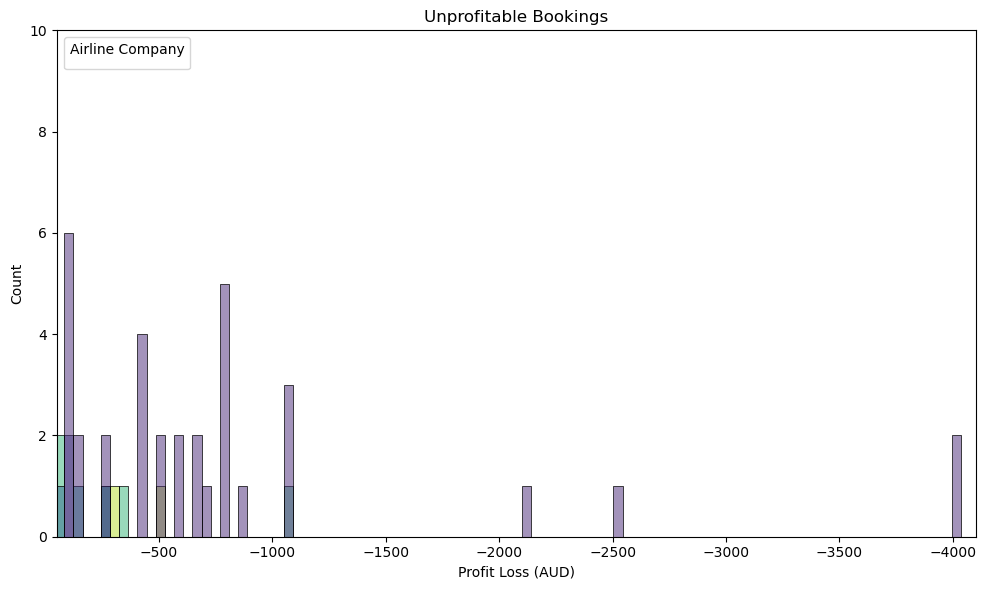

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data=df[df['PROFIT (AUD)'] < 0], x='PROFIT (AUD)', bins =100, hue='FLIGHT_NUMBER', palette='viridis')
plt.xlim(-50, -4100)
plt.xlabel('Profit Loss (AUD)')
plt.ylim(0, 10)
plt.title('Unprofitable Bookings')
plt.legend(title='Airline Company', loc='upper left')
plt.tight_layout()

In [18]:
df[df['PROFIT (AUD)'] < -1000]

,PASSENGER_ID,BOOKING_DATE,FLIGHT_NUMBER,FLIGHT_DEPARTURE_DATE,PASSENGER_ZIP_CODE,PASSENGER_COUNTRY_CODE,AGE,BOOKING_TRAVEL_AGENCY_ZIP_CODE,AIR_FLIGHT_COMPANY_NAME,GENDER_CODE,PROFIT (AUD),booking_month
564,463672038,2012-01-05,QP,2012-03-26,2428,AUS,64.0,3000,C,F,-4036.8264,1
2510,476937378,2012-01-17,QP,2012-03-26,4655,AUS,78.0,4012,C,M,-1070.7857,1
3033,445974627,2012-01-19,QP,2012-03-26,2750,AUS,68.0,4000,C,M,-4031.2016,1
3823,438761494,2012-01-24,QP,2012-03-26,4226,AUS,62.0,4220,C,M,-1060.6575,1
4631,499338190,2012-01-30,QP,2012-03-26,2230,AUS,70.0,4000,C,M,-1057.0263,1
4634,502820523,2012-01-30,QP,2012-03-26,2230,AUS,83.0,4000,C,F,-2131.6390,1
6228,828248961,2012-02-08,QP,2012-03-26,55967171,AUS,80.0,4211,C,M,-2541.1280,2
25914,476234115,2012-08-09,NO,2013-02-20,4218,AUS,78.0,4012,C,F,-1082.7473,8


In [19]:
df[df['PROFIT (AUD)'] < 0]['FLIGHT_NUMBER'].value_counts()

FLIGHT_NUMBER
PD    120
QP     34
SA     23
NO      5
OG      2
OC      2
FD      2
KM      1
Name: count, dtype: int64

In [20]:
df['FLIGHT_NUMBER'].value_counts()

FLIGHT_NUMBER
OG    10410
OC    10104
SA    10086
PD     4979
FD     1404
WB     1388
DH      998
BD      964
PK      700
XQ      671
NO      623
PO      597
FB      582
EM      549
QP      384
PL      382
OV      370
FN      295
XE      295
KM      260
MS      260
EP      258
SK      215
DU      215
KC      211
VO      197
UO      181
HO      129
BC      117
PF      102
XR       70
NT       62
FM       54
RL       17
XM       12
WS        5
Name: count, dtype: int64

In [21]:
QP_percentage_unprofitable = 34/384
QP_percentage_unprofitable

0.08854166666666667

The QP flight appears to be of note in regards to unprofitability. 8.9% of these flights were unprofitable. The QP flight on 2012-03-26 in particular appears to have operated at a large loss. 

In [22]:
#The details of the negative profit outlier QP flight
df[(df['FLIGHT_NUMBER'] == 'QP') & (df['FLIGHT_DEPARTURE_DATE'] == '2012-03-26')].describe()

,PASSENGER_ID,BOOKING_DATE,FLIGHT_DEPARTURE_DATE,AGE,PROFIT (AUD),booking_month
count,1.300000e+01,13,13,13.000000,13.000000,13.000000
mean,5.025403e+08,2012-02-01 18:27:41.538461440,2012-03-26 00:00:00,73.153846,-1225.328038,1.538462
min,4.387615e+08,2012-01-05 00:00:00,2012-03-26 00:00:00,62.000000,-4036.826400,1.000000
25%,4.636720e+08,2012-01-19 00:00:00,2012-03-26 00:00:00,68.000000,-2131.639000,1.000000
50%,4.769374e+08,2012-01-30 00:00:00,2012-03-26 00:00:00,70.000000,-1057.026300,1.000000
75%,4.977955e+08,2012-02-13 00:00:00,2012-03-26 00:00:00,80.000000,0.000000,2.000000
max,8.282490e+08,2012-03-07 00:00:00,2012-03-26 00:00:00,86.000000,0.000000,3.000000
std,9.990849e+07,NaN,NaN,7.701149,1511.568627,0.660225


**Now, we'll explore profitability accross all aspects of the group, first examining which times of the year were most profitable, then we'll look at profitability accross flight number and brand, then we'll do a dive into what demographics are generating the most profit.**

In [23]:
df[df['booking_month'] == 1]['PROFIT (AUD)'].sum()

5935082.1062

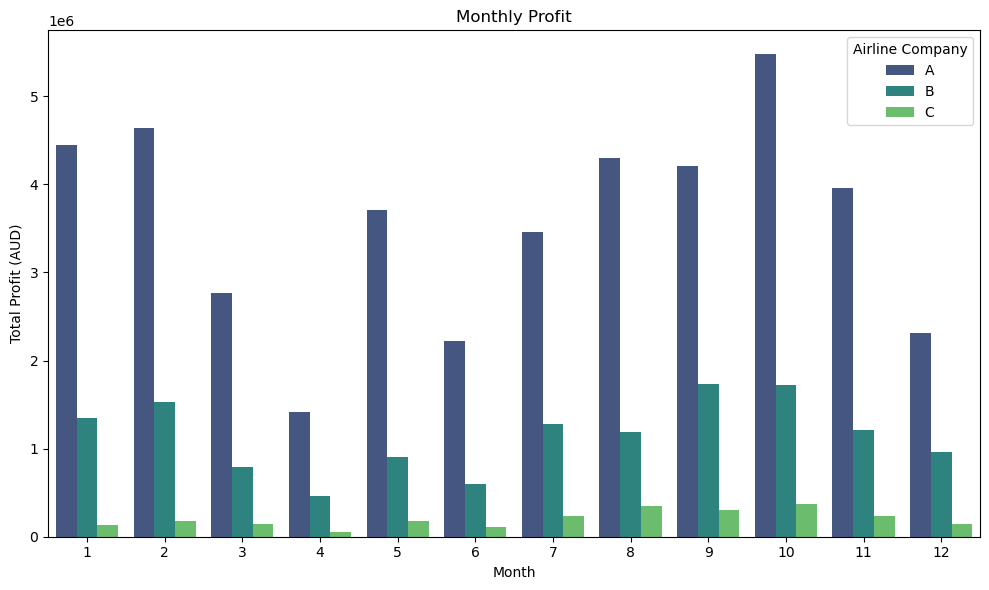

In [24]:
plt.figure(figsize=(10,6))

sns.barplot(x='booking_month', y='PROFIT (AUD)', data=df, estimator='sum', errorbar=None, 
            hue='AIR_FLIGHT_COMPANY_NAME', palette='viridis')

plt.title('Monthly Profit')
plt.xlabel('Month')
plt.ylabel('Total Profit (AUD)')

plt.tight_layout()

plt.legend(title='Airline Company', loc='upper right')


**Now looking into flight numbers and brands.**

In [25]:
sorted_flights = df.groupby('FLIGHT_NUMBER')['PROFIT (AUD)'].median().sort_values().index

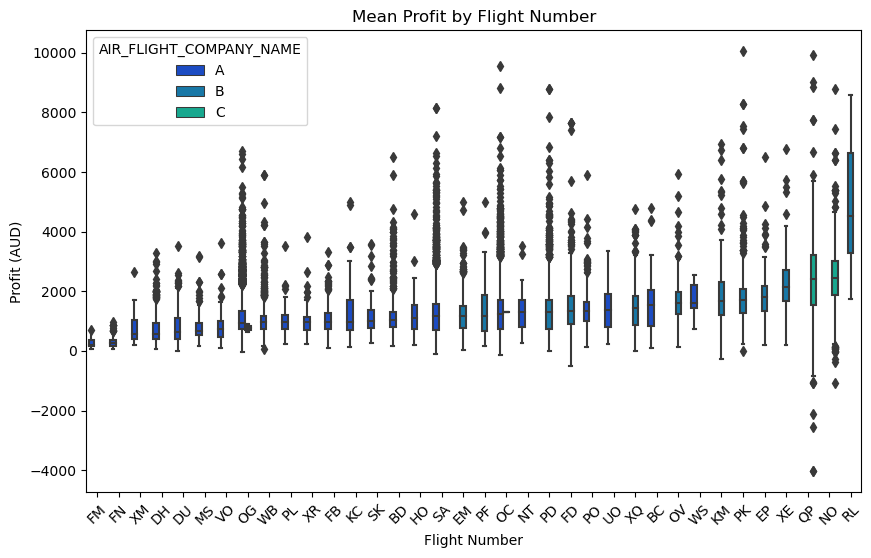

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x='FLIGHT_NUMBER', y='PROFIT (AUD)', data=df, order=sorted_flights, palette='winter', hue='AIR_FLIGHT_COMPANY_NAME')
plt.title('Mean Profit by Flight Number')
plt.ylabel('Profit (AUD)')
plt.xlabel('Flight Number')
plt.xticks(rotation=45)
plt.show()

In [27]:
sorted_profit = df.groupby('FLIGHT_NUMBER')['PROFIT (AUD)'].sum().sort_values()

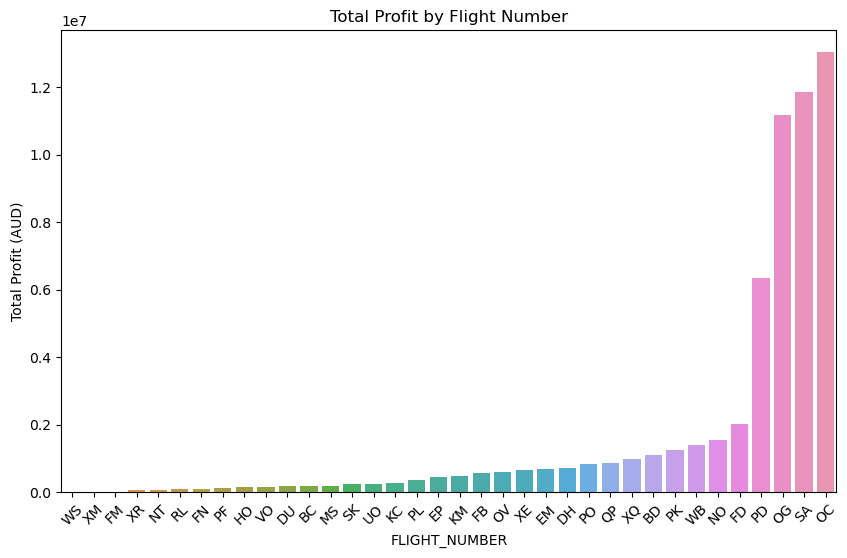

In [28]:
# plt.figure(figsize=(10,6))
# sns.barplot(x='FLIGHT_NUMBER', y='PROFIT (AUD)', data=df, estimator='sum', errorbar=None)
# plt.title('Profit by Flight Number')
# plt.show()
plt.figure(figsize=(10,6))
sns.barplot(x=sorted_profit.index, y=sorted_profit.values, estimator=sum, errorbar=None)
plt.title('Total Profit by Flight Number')
plt.xlabel('FLIGHT_NUMBER')  # Set x-label
plt.ylabel('Total Profit (AUD)')  # Set y-label
plt.xticks(rotation=45)  # Optional: Rotate x-tick labels for better readability
plt.show()

In [29]:
df[df['FLIGHT_NUMBER']=='RL']

,PASSENGER_ID,BOOKING_DATE,FLIGHT_NUMBER,FLIGHT_DEPARTURE_DATE,PASSENGER_ZIP_CODE,PASSENGER_COUNTRY_CODE,AGE,BOOKING_TRAVEL_AGENCY_ZIP_CODE,AIR_FLIGHT_COMPANY_NAME,GENDER_CODE,PROFIT (AUD),booking_month
1255,498143070,2012-01-10,RL,2013-01-06,5680,AUS,62.0,2015,B,F,3285.3905,1
1278,495432815,2012-01-10,RL,2013-01-06,870,AUS,65.0,2015,B,M,3285.3905,1
1279,494317322,2012-01-10,RL,2013-01-06,5680,AUS,67.0,2015,B,M,3285.3905,1
2797,484954613,2012-01-18,RL,2012-09-30,1050,NZL,53.0,1010,B,F,7458.3335,1
6368,875891168,2012-02-08,RL,2013-01-13,3806,AUS,68.0,4000,B,M,6634.0155,2
9111,443399140,2012-02-24,RL,2012-07-08,20461,AUS,37.0,2060,B,M,4511.4100,2
9134,508623970,2012-02-24,RL,2012-07-08,20461,AUS,40.0,2060,B,F,4511.4100,2
10402,509096879,2012-03-03,RL,2013-02-03,0,AUS,8.0,2620,B,M,2776.9691,3
13331,457283040,2012-04-10,RL,2013-01-20,2011,AUS,57.0,2153,B,F,4603.9700,4
19292,510139809,2012-06-18,RL,2013-03-31,WA6151,AUS,59.0,2060,B,F,4685.4673,6


In [30]:
numeric_df = df.select_dtypes(include=[np.number])

In [31]:
df_flight_number_group = numeric_df.groupby(df['FLIGHT_NUMBER'])

Text(0.5, 1.0, 'Mean Profit by Flight Number')

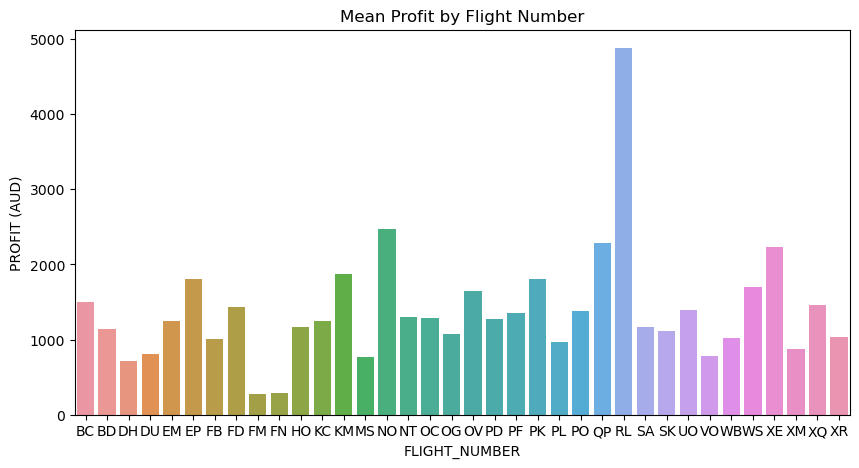

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_flight_number_group.mean().index, y='PROFIT (AUD)', data=df_flight_number_group.mean())
plt.title('Mean Profit by Flight Number')

Let's have a closer look as flight numbers 'FM' and 'FN' as the lowest mean profit producers.

In [33]:
df[df['FLIGHT_NUMBER'] == 'FM'].describe()

,PASSENGER_ID,BOOKING_DATE,FLIGHT_DEPARTURE_DATE,AGE,PROFIT (AUD),booking_month
count,5.400000e+01,54,54,54.000000,54.000000,54.000000
mean,4.715511e+08,2012-06-24 00:53:20,2012-10-15 01:20:00,39.851852,275.825998,6.240741
min,2.252405e+08,2012-01-05 00:00:00,2012-03-23 00:00:00,1.000000,59.763500,1.000000
25%,4.436647e+08,2012-02-17 06:00:00,2012-07-24 06:00:00,21.000000,158.108500,2.000000
50%,4.797887e+08,2012-07-08 00:00:00,2012-11-05 00:00:00,41.500000,200.686100,7.000000
75%,5.002252e+08,2012-10-14 00:00:00,2013-01-04 00:00:00,57.000000,373.737700,10.000000
max,8.334647e+08,2012-12-30 00:00:00,2013-03-08 00:00:00,81.000000,702.210000,12.000000
std,1.279402e+08,NaN,NaN,21.287260,169.153677,3.985517


In [34]:
df[df['FLIGHT_NUMBER'] == 'FN'].describe()

,PASSENGER_ID,BOOKING_DATE,FLIGHT_DEPARTURE_DATE,AGE,PROFIT (AUD),booking_month
count,2.950000e+02,295,295,295.000000,295.000000,295.000000
mean,4.633316e+08,2012-06-19 23:20:56.949152512,2012-11-26 21:04:16.271186432,38.294915,286.784579,6.149153
min,2.249374e+08,2012-01-02 00:00:00,2012-02-17 00:00:00,0.000000,64.970000,1.000000
25%,4.505572e+08,2012-02-23 00:00:00,2012-08-20 00:00:00,23.000000,158.264250,2.000000
50%,4.809441e+08,2012-07-02 00:00:00,2012-10-29 00:00:00,32.000000,265.220000,7.000000
75%,5.002504e+08,2012-10-02 00:00:00,2013-02-25 00:00:00,53.000000,350.686700,10.000000
max,8.741801e+08,2012-12-30 00:00:00,2014-04-28 00:00:00,81.000000,971.880000,12.000000
std,9.838940e+07,NaN,NaN,18.890424,160.433898,3.695666


Let's also have a closer look at the four flight numbers far out performing the other flights in total profit. Those flights are OC, SA, OG and PD.

In [35]:
df_flight_number_group.sum()['PROFIT (AUD)'].sort_values()[-4:]

FLIGHT_NUMBER
PD    6.344263e+06
OG    1.116525e+07
SA    1.184206e+07
OC    1.302641e+07
Name: PROFIT (AUD), dtype: float64

In [36]:
#To calculate the percentage of profit produced by the four max outliers. 
df_flight_number_group.sum()['PROFIT (AUD)'].sort_values()[-4:].sum()/df_flight_number_group.sum()['PROFIT (AUD)'].sort_values().sum()

0.7175900317488524

Diving into the companies.

In [37]:
sorted_flights_company = df.groupby('AIR_FLIGHT_COMPANY_NAME')['PROFIT (AUD)'].median().sort_values().index

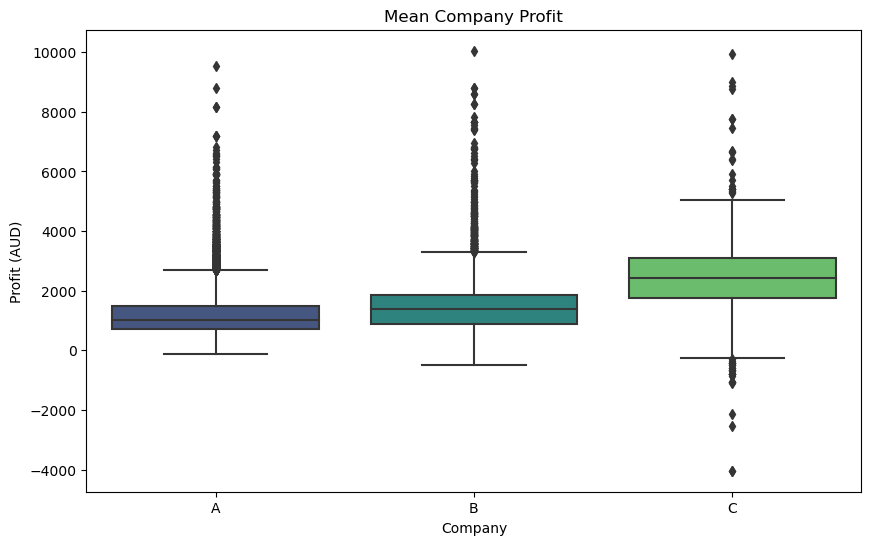

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x='AIR_FLIGHT_COMPANY_NAME', y='PROFIT (AUD)', data=df, order=sorted_flights_company, palette='viridis')
plt.title('Mean Company Profit')
plt.xlabel('Company')  # Set x-label
plt.ylabel('Profit (AUD)')  # Set y-label
#plt.xticks(rotation=45)
plt.show()

In [39]:
sorted_profit_company = df.groupby('AIR_FLIGHT_COMPANY_NAME')['PROFIT (AUD)'].sum().sort_values()

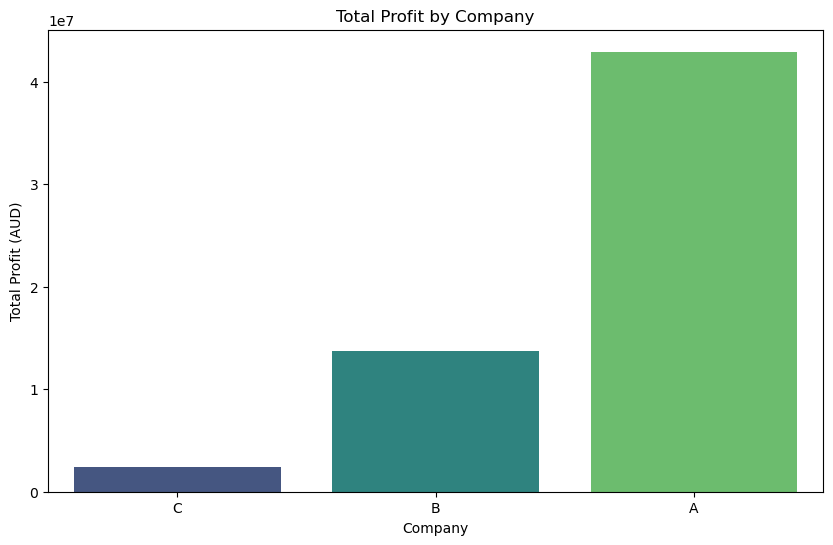

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x=sorted_profit_company.index, y=sorted_profit_company.values, estimator=sum, errorbar=None, palette='viridis')
plt.title('Total Profit by Company')
plt.xlabel('Company')  # Set x-label
plt.ylabel('Total Profit (AUD)')  # Set y-label
#plt.xticks(rotation=45)  # Optional: Rotate x-tick labels for better readability
plt.show()

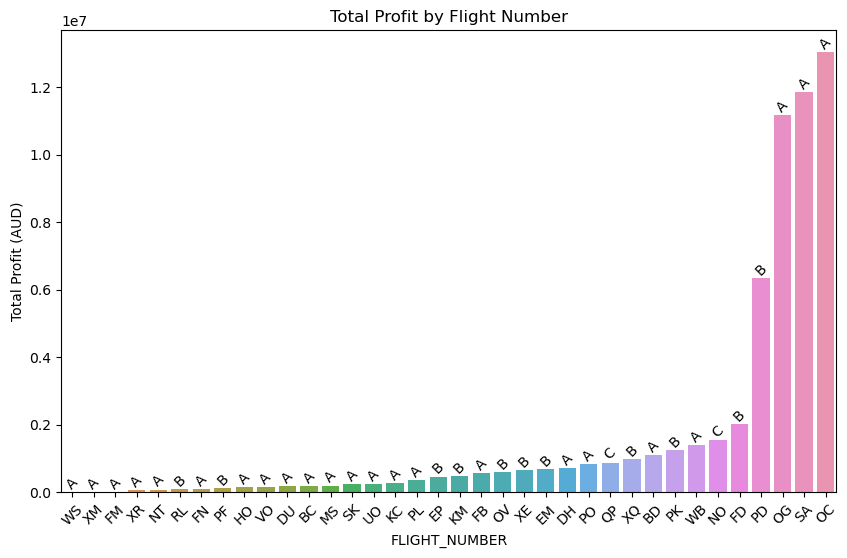

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x=sorted_profit.index, y=sorted_profit.values, estimator=sum, errorbar=None)

for idx, value in enumerate(sorted_profit.index):
    company = df[df['FLIGHT_NUMBER'] == value]['AIR_FLIGHT_COMPANY_NAME'].iloc[0]  # Assuming COMPANY_NAME is in your DataFrame
    plt.text(idx, sorted_profit[value], company, ha='center', va='bottom', rotation=45)

plt.title('Total Profit by Flight Number')
plt.xlabel('FLIGHT_NUMBER')
plt.ylabel('Total Profit (AUD)')
plt.xticks(rotation=45)
plt.show()

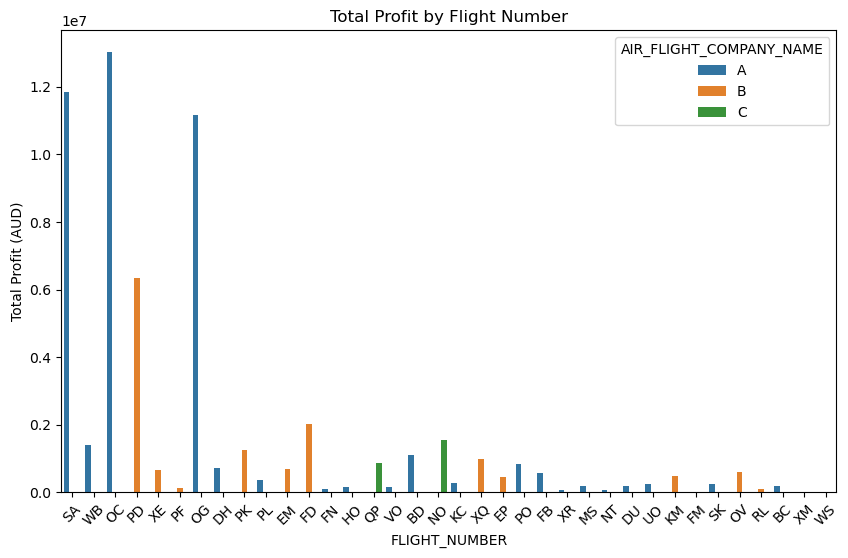

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x='FLIGHT_NUMBER', y='PROFIT (AUD)', hue='AIR_FLIGHT_COMPANY_NAME', data=df, estimator='sum', errorbar=None)
plt.title('Total Profit by Flight Number')
plt.xlabel('FLIGHT_NUMBER')
plt.ylabel('Total Profit (AUD)')
plt.xticks(rotation=45)
plt.show()

In [43]:
df[df['AIR_FLIGHT_COMPANY_NAME'] == 'A']['FLIGHT_NUMBER'].value_counts()

FLIGHT_NUMBER
OG    10408
OC    10103
SA    10086
WB     1388
DH      998
BD      964
PO      597
FB      582
PL      382
FN      295
MS      260
DU      215
SK      215
KC      211
VO      197
UO      181
HO      129
BC      117
XR       70
NT       62
FM       54
XM       12
WS        5
Name: count, dtype: int64

In [44]:
df[df['AIR_FLIGHT_COMPANY_NAME'] == 'B']['FLIGHT_NUMBER'].value_counts()

FLIGHT_NUMBER
PD    4979
FD    1404
PK     700
XQ     671
EM     549
OV     370
XE     295
KM     260
EP     258
PF     102
RL      17
OG       2
OC       1
Name: count, dtype: int64

In [45]:
A_flight_numbers = df[df['AIR_FLIGHT_COMPANY_NAME'] == 'A']['FLIGHT_NUMBER'].values

In [46]:
B_flight_numbers = df[df['AIR_FLIGHT_COMPANY_NAME'] == 'B']['FLIGHT_NUMBER'].values

In [47]:
matching_values = set(A_flight_numbers) & set(B_flight_numbers)

# If you need the result as a list
matching_values_list = list(matching_values)
print(matching_values_list)

['OC', 'OG']


It looks like the OG and OC bookings from company B were likely mistakes and belong to company A. Changing those bookings to company A below.

In [48]:
df.loc[(df['AIR_FLIGHT_COMPANY_NAME'] == 'B') & (df['FLIGHT_NUMBER'] == 'OG'), 'AIR_FLIGHT_COMPANY_NAME'] = 'A'

In [49]:
df.loc[(df['AIR_FLIGHT_COMPANY_NAME'] == 'B') & (df['FLIGHT_NUMBER'] == 'OC'), 'AIR_FLIGHT_COMPANY_NAME'] = 'A'

In [50]:
C_flight_numbers = df[df['AIR_FLIGHT_COMPANY_NAME'] == 'C']['FLIGHT_NUMBER'].values

In [51]:
#Now checking if there's any overlap with company A and C flight numbers
matching_values = set(A_flight_numbers) & set(C_flight_numbers)

# If you need the result as a list
matching_values_list = list(matching_values)
print(matching_values_list)

[]


In [52]:
#Now checking if there's any overlap with company B and C flight numbers
matching_values = set(B_flight_numbers) & set(C_flight_numbers)

# If you need the result as a list
matching_values_list = list(matching_values)
print(matching_values_list)

[]


In [53]:
grouped_flightNumber_Company = df.groupby(['FLIGHT_NUMBER', 'AIR_FLIGHT_COMPANY_NAME'])['PROFIT (AUD)'].sum().reset_index()

# Step 2: Sort the Data
sorted_group_flightNumber_Company = grouped_flightNumber_Company.sort_values(by='PROFIT (AUD)', ascending=True)

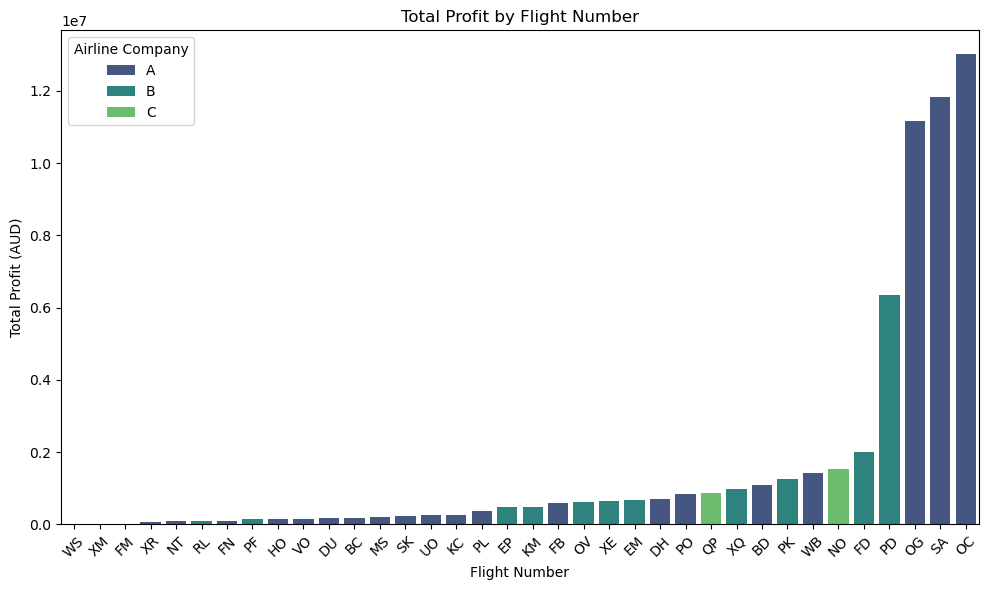

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(x='FLIGHT_NUMBER', y='PROFIT (AUD)', hue='AIR_FLIGHT_COMPANY_NAME', data=sorted_group_flightNumber_Company, 
            estimator='sum', errorbar=None, dodge=False, palette='viridis')
plt.title('Total Profit by Flight Number')
plt.xlabel('Flight Number')
plt.ylabel('Total Profit (AUD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Airline Company', loc='upper left')

plt.show()

**Now looking at profit by georgraphy.**

In [55]:
df_AUS_NZL_GBR = df[(df['PASSENGER_COUNTRY_CODE'] == 'AUS') | (df['PASSENGER_COUNTRY_CODE'] == 'NZL') | (df['PASSENGER_COUNTRY_CODE'] == 'GBR')]

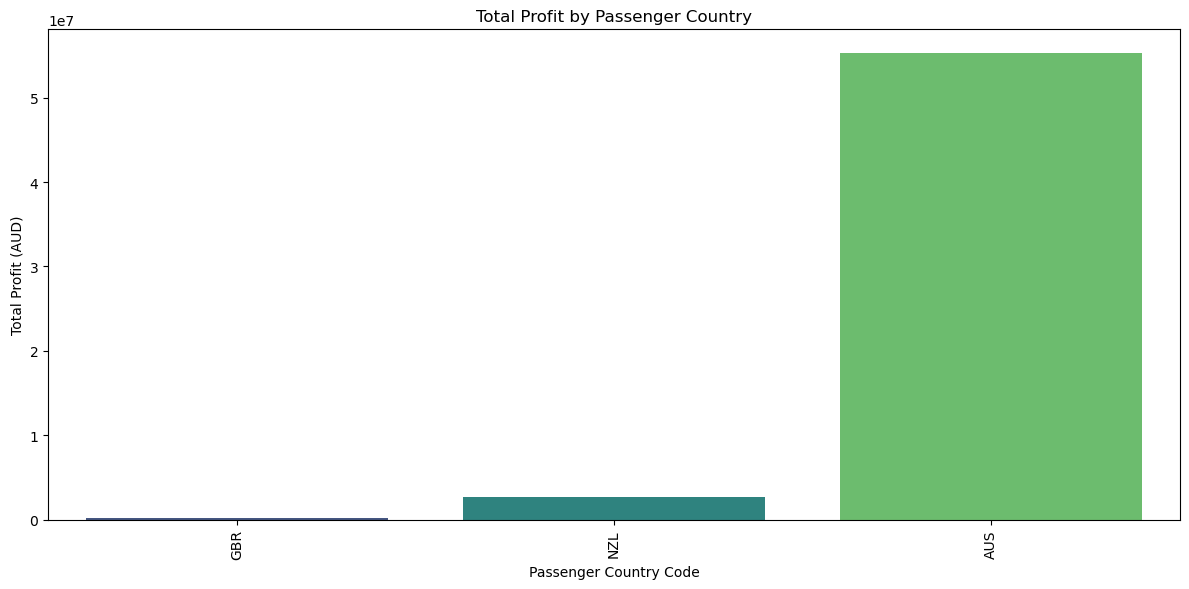

In [56]:
# Step 1: Group by Country Code and Summarize Profit
grouped_country_profit = df_AUS_NZL_GBR.groupby('PASSENGER_COUNTRY_CODE')['PROFIT (AUD)'].sum().reset_index()

# Step 2: Sort the Result by Profit
sorted_country_profit = grouped_country_profit.sort_values(by='PROFIT (AUD)', ascending=True)

# Step 3: Plot Data
plt.figure(figsize=(12, 6))
sns.barplot(x='PASSENGER_COUNTRY_CODE', y='PROFIT (AUD)', data=sorted_country_profit, palette='viridis')
plt.title('Total Profit by Passenger Country')
plt.xlabel('Passenger Country Code')
plt.ylabel('Total Profit (AUD)')
plt.xticks(rotation=90)  # Optional: Rotate x-tick labels for better readability
plt.tight_layout()
plt.show()

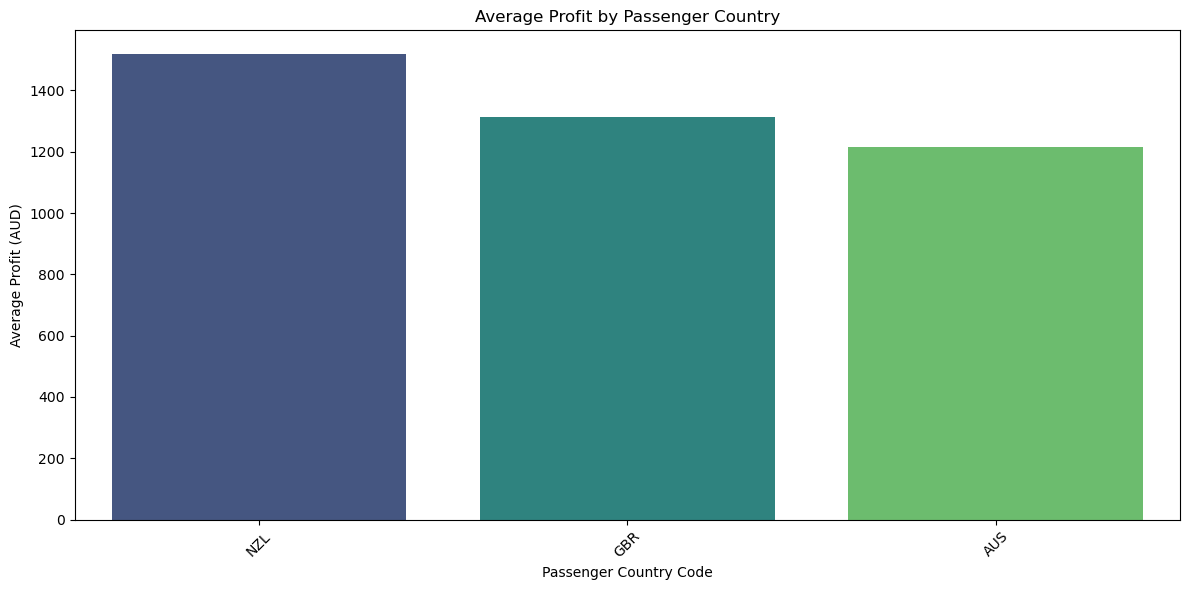

In [57]:
# Step 1: Group by Country Code and Calculate Mean Profit
grouped_country_profit = df_AUS_NZL_GBR.groupby('PASSENGER_COUNTRY_CODE')['PROFIT (AUD)'].mean().reset_index()

# Step 2: Sort the Result by Mean Profit
sorted_country_profit = grouped_country_profit.sort_values(by='PROFIT (AUD)', ascending=False)

# Step 3: Plot Data
plt.figure(figsize=(12, 6))
sns.barplot(x='PASSENGER_COUNTRY_CODE', y='PROFIT (AUD)', data=sorted_country_profit, palette='viridis')
plt.title('Average Profit by Passenger Country')
plt.xlabel('Passenger Country Code')
plt.ylabel('Average Profit (AUD)')
plt.xticks(rotation=45)  # Optional: Rotate x-tick labels for better readability
plt.tight_layout()
plt.show()

Looking at profit analaysis by zip code

In [58]:
df_AUS = df[df['PASSENGER_COUNTRY_CODE'] == 'AUS']

In [59]:
df_AUS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45520 entries, 0 to 48153
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   PASSENGER_ID                    45520 non-null  int64         
 1   BOOKING_DATE                    45520 non-null  datetime64[ns]
 2   FLIGHT_NUMBER                   45520 non-null  object        
 3   FLIGHT_DEPARTURE_DATE           45520 non-null  datetime64[ns]
 4   PASSENGER_ZIP_CODE              45520 non-null  object        
 5   PASSENGER_COUNTRY_CODE          45520 non-null  object        
 6   AGE                             45520 non-null  float64       
 7   BOOKING_TRAVEL_AGENCY_ZIP_CODE  45520 non-null  object        
 8   AIR_FLIGHT_COMPANY_NAME         45520 non-null  object        
 9   GENDER_CODE                     45520 non-null  object        
 10  PROFIT (AUD)                    45520 non-null  float64       
 11  booking

In [60]:
df_AUS[df_AUS['PASSENGER_ZIP_CODE'].str.len() > 4].shape[0]

261

In [61]:
df_AUS[(df_AUS['PASSENGER_ZIP_CODE'].str.len() > 4) | (df_AUS['PASSENGER_ZIP_CODE'].str.len() < 4)]

,PASSENGER_ID,BOOKING_DATE,FLIGHT_NUMBER,FLIGHT_DEPARTURE_DATE,PASSENGER_ZIP_CODE,PASSENGER_COUNTRY_CODE,AGE,BOOKING_TRAVEL_AGENCY_ZIP_CODE,AIR_FLIGHT_COMPANY_NAME,GENDER_CODE,PROFIT (AUD),booking_month
1425,443444987,2012-01-10,XQ,2012-06-22,WA 6153,AUS,56.0,4000,B,M,1289.0760,1
1562,290968112,2012-01-11,XE,2012-06-23,VIC 3101,AUS,72.0,3000,B,M,1519.0520,1
1584,501675944,2012-01-11,OG,2012-02-03,NSW2011,AUS,35.0,2060,A,M,310.6100,1
1937,508872015,2012-01-13,MS,2012-07-01,VIC3186,AUS,53.0,2060,A,F,1189.0400,1
1939,494305442,2012-01-13,SA,2012-10-22,WA6164,AUS,76.0,6000,A,F,1119.2373,1
...,...,...,...,...,...,...,...,...,...,...,...,...
47466,445968371,2012-12-24,SA,2013-12-27,NSW 2576,AUS,13.0,2113,A,M,2069.6060,12
47582,494121039,2012-12-26,PD,2013-12-10,QLD 4814,AUS,13.0,2060,B,F,865.1423,12
47767,491277727,2012-12-28,OG,2013-02-11,NSW,AUS,73.0,2250,A,F,2002.8026,12
47815,491026037,2012-12-28,OG,2013-03-01,2641NSW,AUS,55.0,2606,A,M,776.4627,12


In [62]:
df_AUS['PASSENGER_ZIP_CODE'].describe()

count     45520
unique     2075
top        6210
freq        369
Name: PASSENGER_ZIP_CODE, dtype: int64

I'm going to extract the zip code from those of improper format where possible.

In [63]:
import re

In [64]:
# Regular expression to identify 4-digit pattern
zip_code_pattern = r'(\d{4})'

# Find zip codes longer than 4-characters, identify a 4-digit string within (if there is one), 
# and replace the original value with the identified zip code. If the string is less than 3 characters just drop it
def zip_code_corrector(zip_code):
    if isinstance(zip_code, int):
        # If zip_code is integer, convert it to string since we want a uniform data type in our column
        return str(zip_code)
    elif isinstance(zip_code, str):
        if len(zip_code) == 4:
            return zip_code
        elif len(zip_code) < 4:
            # Converting non-useful zip codes to a placeholder (here, '0')
            return '0'
        elif len(zip_code) > 4:
            # Extracting 4-digit sequence
            extracted_zip = re.findall(zip_code_pattern, zip_code)
            # Check if a 4-digit sequence was found, if so, return the first found sequence
            if extracted_zip:
                return extracted_zip[0]
            else:
                # Return a placeholder if no valid zip code was found
                return '0'
    # Handle non-str/int cases, if needed
    else:
        return '0'

In [65]:
df_AUS['PASSENGER_ZIP_CODE'] = df_AUS['PASSENGER_ZIP_CODE'].apply(zip_code_corrector)

C:\Users\alexs\AppData\Local\Temp\ipykernel_17964\4082779478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AUS['PASSENGER_ZIP_CODE'] = df_AUS['PASSENGER_ZIP_CODE'].apply(zip_code_corrector)


In [66]:
df_AUS[(df_AUS['PASSENGER_ZIP_CODE'].str.len() > 4) | (df_AUS['PASSENGER_ZIP_CODE'].str.len() < 4)]

,PASSENGER_ID,BOOKING_DATE,FLIGHT_NUMBER,FLIGHT_DEPARTURE_DATE,PASSENGER_ZIP_CODE,PASSENGER_COUNTRY_CODE,AGE,BOOKING_TRAVEL_AGENCY_ZIP_CODE,AIR_FLIGHT_COMPANY_NAME,GENDER_CODE,PROFIT (AUD),booking_month
36,224900322,2012-01-02,SA,2012-12-22,812,AUS,52.0,2060,A,M,1488.0800,1
161,457268827,2012-01-03,PD,2012-05-23,0,AUS,60.0,2060,B,M,1378.6100,1
333,826973057,2012-01-04,OC,2012-04-05,812,AUS,53.0,3181,A,M,1693.5098,1
825,449296365,2012-01-08,OG,2012-04-13,820,AUS,46.0,2062,A,M,851.5164,1
1020,449964418,2012-01-09,PO,2012-07-16,612504002,AUS,58.0,4000,A,F,2189.3110,1
...,...,...,...,...,...,...,...,...,...,...,...,...
47893,292051024,2012-12-30,PD,2014-04-11,31370,AUS,52.0,2060,B,F,2153.5419,12
47912,508323043,2012-12-30,PD,2014-04-11,31370,AUS,53.0,2060,B,M,2153.5419,12
47951,454242494,2012-12-30,OG,2013-12-28,601,AUS,67.0,632,A,F,1798.8680,12
47970,873596553,2012-12-30,OG,2013-04-03,27885,AUS,71.0,2015,A,F,706.6600,12


In [67]:
df_AUS['PASSENGER_ZIP_CODE'][1020]

'612504002'

In [68]:
# Dropping any remaining improper zip codes
df_AUS = df_AUS[df_AUS['PASSENGER_ZIP_CODE'].str.len() == 4]

In [69]:
df_AUS[df_AUS['PASSENGER_ZIP_CODE'].str.len() < 4].shape[0]

0

In [70]:
df_AUS

,PASSENGER_ID,BOOKING_DATE,FLIGHT_NUMBER,FLIGHT_DEPARTURE_DATE,PASSENGER_ZIP_CODE,PASSENGER_COUNTRY_CODE,AGE,BOOKING_TRAVEL_AGENCY_ZIP_CODE,AIR_FLIGHT_COMPANY_NAME,GENDER_CODE,PROFIT (AUD),booking_month
0,290344686,2012-01-01,SA,2013-01-13,2075,AUS,55.0,2022,A,M,2909.7927,1
1,247630864,2012-01-01,WB,2013-05-04,4118,AUS,48.0,2060,A,F,1119.9226,1
2,491321871,2012-01-01,SA,2013-01-13,2232,AUS,53.0,2060,A,F,2447.9628,1
3,443821994,2012-01-01,SA,2013-01-05,2171,AUS,52.0,2606,A,M,1088.3543,1
4,476584402,2012-01-01,SA,2013-01-05,2171,AUS,18.0,2606,A,M,739.8303,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48149,476598949,2012-12-31,FD,2013-11-02,2525,AUS,44.0,3004,B,M,1434.0926,12
48150,484962988,2012-12-31,OC,2013-10-13,4124,AUS,52.0,4000,A,M,979.3916,12
48151,444855447,2012-12-31,SA,2013-11-23,6010,AUS,4.0,2062,A,F,4236.2398,12
48152,494086695,2012-12-31,FB,2013-12-28,4074,AUS,69.0,4000,A,M,904.7651,12


In [71]:
df_AUS['PASSENGER_ZIP_CODE'].nunique()

1857

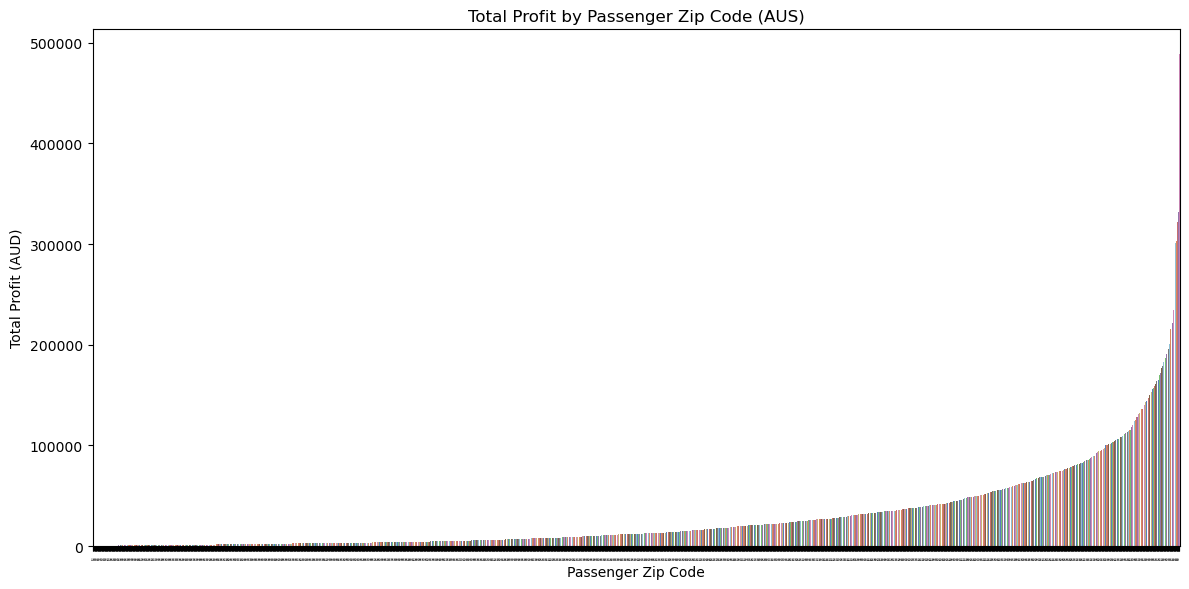

In [72]:
# Step 1: Group by Country Code and Summarize Profit
grouped_zip_code_profit = df_AUS.groupby('PASSENGER_ZIP_CODE')['PROFIT (AUD)'].sum().reset_index()

# Step 2: Sort the Result by Profit
sorted_zip_code_profit = grouped_zip_code_profit.sort_values(by='PROFIT (AUD)', ascending=True)

# Step 3: Plot Data
plt.figure(figsize=(12, 6))
sns.barplot(x='PASSENGER_ZIP_CODE', y='PROFIT (AUD)', data=sorted_zip_code_profit, palette='muted', dodge=False)
plt.title('Total Profit by Passenger Zip Code (AUS)')
plt.xlabel('Passenger Zip Code')
plt.ylabel('Total Profit (AUD)')
plt.xticks(rotation=90, fontsize=0)  # Optional: Rotate x-tick labels for better readability
plt.tight_layout()
plt.show()

In [73]:
# Step 1: Group by Country Code and Summarize Profit
grouped_zip_code_profit = df_AUS.groupby('PASSENGER_ZIP_CODE')['PROFIT (AUD)'].sum().reset_index()

# Step 2: Sort the Result by Profit
sorted_zip_code_profit = grouped_zip_code_profit.sort_values(by='PROFIT (AUD)', ascending=False)

In [74]:
zip_code_profit_percentage = [profit/df_AUS['PROFIT (AUD)'].sum() for profit in sorted_zip_code_profit['PROFIT (AUD)']]

In [75]:
sorted_zip_code_profit['zip_code_profit_percentage'] = zip_code_profit_percentage

In [76]:
sorted_zip_code_profit

,PASSENGER_ZIP_CODE,PROFIT (AUD),zip_code_profit_percentage
1648,6210,488779.9900,8.928914e-03
158,2153,357710.5088,6.534569e-03
401,2560,331639.3650,6.058307e-03
236,2259,322193.1809,5.885747e-03
160,2155,318941.5837,5.826347e-03
...,...,...,...
482,2746,2.3407,4.275934e-08
1072,4111,0.0000,0.000000e+00
1010,3981,0.0000,0.000000e+00
16,1590,0.0000,0.000000e+00


In [77]:
sorted_zip_code_profit = sorted_zip_code_profit.reset_index()

In [78]:
sorted_zip_code_profit

,index,PASSENGER_ZIP_CODE,PROFIT (AUD),zip_code_profit_percentage
0,1648,6210,488779.9900,8.928914e-03
1,158,2153,357710.5088,6.534569e-03
2,401,2560,331639.3650,6.058307e-03
3,236,2259,322193.1809,5.885747e-03
4,160,2155,318941.5837,5.826347e-03
...,...,...,...,...
1852,482,2746,2.3407,4.275934e-08
1853,1072,4111,0.0000,0.000000e+00
1854,1010,3981,0.0000,0.000000e+00
1855,16,1590,0.0000,0.000000e+00


In [79]:
d = 0
i = 0
while d < 0.20:
    d += sorted_zip_code_profit['zip_code_profit_percentage'][i]
    i += 1
    
print(f'{i} iterations')

53 iterations


Therefore 220 of 1856 (12%) zip codes are producing approximately 50% of the total Australian profit. Those zip codes are below.

In [80]:
sorted_zip_code_profit.head(20)

,index,PASSENGER_ZIP_CODE,PROFIT (AUD),zip_code_profit_percentage
0,1648,6210,488779.9900,0.008929
1,158,2153,357710.5088,0.006535
2,401,2560,331639.3650,0.006058
3,236,2259,322193.1809,0.005886
4,160,2155,318941.5837,0.005826
5,229,2250,302621.7605,0.005528
6,159,2154,302494.0544,0.005526
7,238,2261,301049.8158,0.005500
8,174,2170,286043.7839,0.005225
9,224,2234,283754.1788,0.005184


I'll determine whether post codes are city and major regional centers or regional. This will be of interest later too in determing customrer differences.

In [81]:
df_AUS['PASSENGER_ZIP_CODE'][0]

'2075'

In [82]:
def zip_code_integer(zip_code):
    if isinstance(zip_code, str):
        # If zip_code is integer, convert it to string since we want a uniform data type in our column
        try:
            return int(zip_code)
        except:
            return 0

In [83]:
df_AUS['PASSENGER_ZIP_CODE'] = df_AUS['PASSENGER_ZIP_CODE'].apply(zip_code_integer)

In [84]:
df_AUS['PASSENGER_ZIP_CODE'] = df_AUS['PASSENGER_ZIP_CODE'].astype(int)

In [85]:
#Establishing the lists of metropolitan post codes per state.
metropolitan_zip_codes = [1235, 1236, 1237, 1466, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 
                          2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 
                          2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 
                          2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 
                          2048, 2049, 2050, 2051, 2052, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 
                          2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 
                          2076, 2077, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 
                          2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2099, 2100, 2101, 2102, 2103, 
                          2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 
                          2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 
                          2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 
                          2143, 2144, 2145, 2146, 2147, 2148, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 
                          2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 
                          2170, 2171, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2190, 2191, 2192, 2193, 
                          2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 
                          2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2216, 2217, 2218, 2219, 2220, 
                          2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 2233, 
                          2234, 2251, 2252, 2256, 2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2267, 
                          2278, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2287, 2289, 2290, 2291, 2292, 
                          2293, 2294, 2295, 2296, 2297, 2298, 2299, 2300, 2302, 2303, 2304, 2305, 2306, 
                          2307, 2308, 2309, 2310, 2314, 2322, 2323, 2485, 2486, 2500, 2502, 2505, 2506, 
                          2508, 2515, 2516, 2517, 2518, 2519, 2520, 2525, 2526, 2527, 2529, 2530, 2558, 
                          2559, 2560, 2563, 2564, 2565, 2566, 2567, 2568, 2571, 2745, 2746, 2747, 2748, 
                          2749, 2750, 2751, 2754, 2755, 2759, 2760, 2762, 2763, 2764, 2765, 2766, 2767, 
                          2768, 2770, 2761, 4000, 
                          4005, 4006, 4007, 4008, 4009, 4010, 4011, 4012, 4013, 4014, 4017, 4018, 4019, 
                          4020, 4021, 4022, 4029, 4030, 4031, 4032, 4034, 4035, 4036, 4037, 4051, 4052, 
                          4053, 4054, 4055, 4059, 4060, 4061, 4064, 4065, 4066, 4067, 4068, 4069, 4070, 
                          4072, 4073, 4074, 4075, 4076, 4077, 4078, 4101, 4102, 4103, 4104, 4105, 4106, 
                          4107, 4108, 4109, 4110, 4111, 4112, 4113, 4114, 4115, 4116, 4117, 4118, 4119, 
                          4120, 4121, 4122, 4123, 4125, 4127, 4128, 4129, 4130, 4131, 4132, 4133, 4151, 
                          4152, 4153, 4154, 4155, 4156, 4157, 4158, 4159, 4160, 4161, 4163, 4164, 4165, 
                          4169, 4170, 4171, 4172, 4173, 4174, 4178, 4179, 4205, 4207, 4209, 4210, 4211, 
                          4212, 4213, 4214, 4215, 4216, 4217, 4218, 4219, 4220, 4221, 4222, 4223, 4224, 
                          4225, 4226, 4227, 4228, 4229, 4230, 4231, 4300, 4301, 4303, 4304, 4305, 4500, 
                          4501, 4502, 4503, 4504, 4505, 4506, 4508, 4509, 4510, 4511, 4551, 4553, 4555, 
                          4556, 4557, 4558, 4559, 4564, 4566, 4567, 4572, 4573, 4575, 4810, 4812, 4813, 
                          4814, 4817, 4870, 5000, 5002, 5003, 5004, 5005, 5006, 5007, 5008, 5009, 5010, 
                          5011, 5012, 5013, 5014, 5015, 5016, 5017, 5018, 5019, 5020, 5021, 5022, 5023, 
                          5024, 5025, 5026, 5027, 5028, 5029, 5030, 5031, 5032, 5033, 5034, 5035, 5037, 
                          5038, 5039, 5040, 5041, 5042, 5043, 5044, 5045, 5046, 5047, 5048, 5049, 5050, 
                          5051, 5052, 5061, 5062, 5063, 5064, 5065, 5066, 5067, 5068, 5069, 5070, 5071, 
                          5072, 5073, 5074, 5075, 5076, 5081, 5082, 5083, 5084, 5085, 5086, 5087, 5088, 
                          5089, 5090, 5091, 5092, 5093, 5094, 5095, 5096, 5097, 5098, 5106, 5107, 5108, 
                          5109, 5110, 5111, 5112, 5113, 5115, 5116, 5117, 5118, 5120, 5121, 5125, 5126, 
                          5158, 5159, 5160, 5161, 5164, 5165, 5166, 5167, 5168, 5169, 5170, 5173, 5950, 
                          7000, 7001, 7002, 7004, 7005, 7006, 7007, 7008, 7009, 7010, 7011, 7015, 7018, 
                          7019, 7170, 7248, 7249, 7250, 7320, 3000, 3002, 3003, 3004, 3005, 3006, 3008, 
                          3011, 3012, 3013, 3015, 3016, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 
                          3026, 3027, 3028, 3029, 3031, 3032, 3033, 3034, 3036, 3037, 3038, 3039, 3040, 
                          3041, 3042, 3043, 3044, 3045, 3046, 3047, 3048, 3049, 3051, 3052, 3053, 3054, 
                          3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3064, 3065, 3066, 3067, 3068, 
                          3070, 3071, 3072, 3073, 3074, 3075, 3076, 3078, 3079, 3081, 3082, 3083, 3084, 
                          3085, 3087, 3088, 3089, 3090, 3093, 3094, 3095, 3101, 3102, 3103, 3104, 3105, 
                          3106, 3107, 3108, 3109, 3111, 3114, 3116, 3121, 3122, 3123, 3124, 3125, 3126, 
                          3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3140, 
                          3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 
                          3155, 3156, 3161, 3162, 3163, 3165, 3166, 3167, 3168, 3169, 3170, 3171, 3172, 
                          3173, 3174, 3175, 3177, 3178, 3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 
                          3187, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3198, 3199, 
                          3200, 3201, 3202, 3204, 3205, 3206, 3207, 3211, 3212, 3214, 3215, 3216, 3218, 
                          3219, 3220, 3221, 3335, 3337, 3338, 3429, 3752, 3754, 3765, 3802, 3803, 3805, 
                          3806, 3807, 3809, 3810, 3910, 3930, 3931, 3975, 3976, 6000, 6003, 6004, 6005, 
                          6006, 6007, 6008, 6009, 6010, 6011, 6012, 6014, 6015, 6016, 6017, 6018, 6019, 
                          6020, 6021, 6022, 6023, 6024, 6025, 6026, 6027, 6028, 6029, 6030, 6031, 6050, 
                          6051, 6052, 6053, 6054, 6055, 6056, 6057, 6058, 6059, 6060, 6061, 6062, 6063, 
                          6064, 6065, 6066, 6067, 6068, 6069, 6072, 6073, 6076, 6081, 6084, 6090, 6100, 
                          6101, 6102, 6103, 6104, 6105, 6106, 6107, 6108, 6109, 6110, 6111, 6112, 6121, 
                          6122, 6123, 6147, 6148, 6149, 6150, 6151, 6152, 6153, 6154, 6155, 6156, 6157, 
                          6158, 6159, 6160, 6162, 6163, 6164, 6165, 6166, 6167, 6168, 6169, 6170, 6171, 
                          6172, 6173, 6174, 6175, 6176, 6210]

In [86]:
#Creating a city/regional boolean column
metropolitan_regional = []
for zip in df_AUS['PASSENGER_ZIP_CODE']:
    if zip in metropolitan_zip_codes:
        metropolitan_regional.append('metropolitan')
    else:
        metropolitan_regional.append('regional')

In [87]:
df_AUS['metropolitan_regional'] = metropolitan_regional

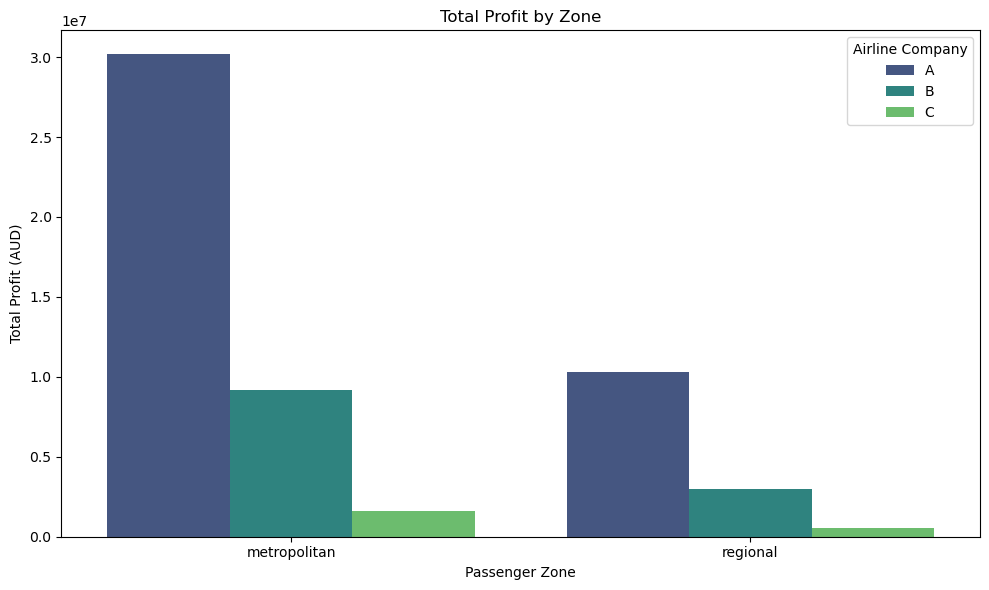

In [88]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_AUS, x='metropolitan_regional', y='PROFIT (AUD)', estimator='sum', errorbar=None, 
            hue='AIR_FLIGHT_COMPANY_NAME', palette='viridis')
plt.title('Total Profit by Zone')
plt.xlabel('Passenger Zone')
plt.ylabel('Total Profit (AUD)')
plt.tight_layout()
plt.legend(title='Airline Company')

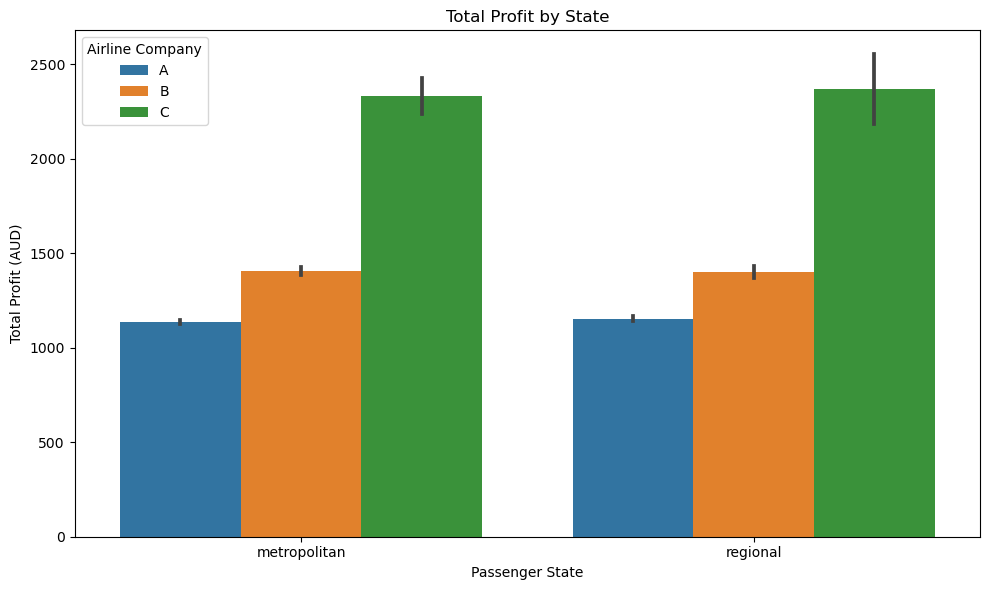

In [91]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_AUS, x='metropolitan_regional', y='PROFIT (AUD)', estimator='mean', 
            hue='AIR_FLIGHT_COMPANY_NAME')
plt.title('Total Profit by State')
plt.xlabel('Passenger State')
plt.ylabel('Total Profit (AUD)')
plt.tight_layout()
plt.legend(title='Airline Company', loc='upper left')

In [92]:
df_AUS[df_AUS['metropolitan_regional'] == 'metropolitan']['PROFIT (AUD)'].sum()/df_AUS['PROFIT (AUD)'].sum()

0.7482001590514072

Therefore 75% of total profit is coming from metropolitan sales. Although this number was an estimate given the data and the cross referencing of sources, this is surprisingly lower than the percentage of urban dwellers in Aus which is 86%.

What about the booking travel agency?

In [93]:
df_AUS['BOOKING_TRAVEL_AGENCY_ZIP_CODE'] = df_AUS['BOOKING_TRAVEL_AGENCY_ZIP_CODE'].apply(zip_code_corrector)

In [94]:
df_AUS['BOOKING_TRAVEL_AGENCY_ZIP_CODE'].nunique()

586

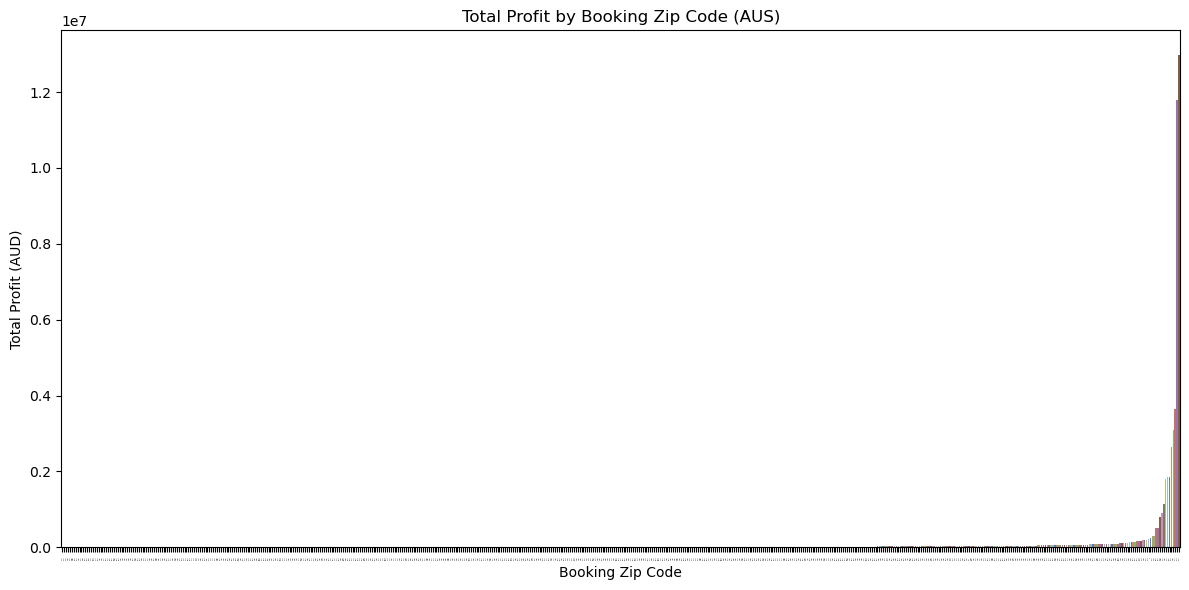

In [95]:
# Step 1: Group by Booking Zip Code and Summarize Profit
grouped_booking_zip_code_profit = df_AUS.groupby('BOOKING_TRAVEL_AGENCY_ZIP_CODE')['PROFIT (AUD)'].sum().reset_index()

# Step 2: Sort the Result by Profit
sorted_booking_zip_code_profit = grouped_booking_zip_code_profit.sort_values(by='PROFIT (AUD)', ascending=True)

# Step 3: Plot Data
plt.figure(figsize=(12, 6))
sns.barplot(x='BOOKING_TRAVEL_AGENCY_ZIP_CODE', y='PROFIT (AUD)', data=sorted_booking_zip_code_profit, 
            palette='muted', dodge=False)
plt.title('Total Profit by Booking Zip Code (AUS)')
plt.xlabel('Booking Zip Code')
plt.ylabel('Total Profit (AUD)')
plt.xticks(rotation=90, fontsize=0)  # Optional: Rotate x-tick labels for better readability
plt.tight_layout()
plt.show()

In [96]:
sorted_booking_zip_code_profit = grouped_booking_zip_code_profit.sort_values(by='PROFIT (AUD)', ascending=False).reset_index()

In [97]:
sorted_booking_zip_code_profit

,index,BOOKING_TRAVEL_AGENCY_ZIP_CODE,PROFIT (AUD)
0,27,2060,1.297847e+07
1,367,4000,1.180003e+07
2,9,2015,3.636901e+06
3,197,2606,3.094857e+06
4,29,2062,2.637477e+06
...,...,...,...
581,218,2794,3.963971e+02
582,120,2265,3.748680e+02
583,476,5039,3.082337e+02
584,14,2027,2.250810e+02


In [98]:
booking_zip_code_profit_percentage = [profit/df_AUS['PROFIT (AUD)'].sum() for profit in sorted_booking_zip_code_profit['PROFIT (AUD)']]

In [99]:
sorted_booking_zip_code_profit['booking_zip_code_profit_percentage'] = booking_zip_code_profit_percentage

In [100]:
strings = 0
integers = 0
for i in sorted_booking_zip_code_profit['BOOKING_TRAVEL_AGENCY_ZIP_CODE']:
    if isinstance(i, str):
        strings += 1
    elif isinstance(i, int):
        integers += 1
print(f'{strings} strings and {integers} integers')

586 strings and 0 integers


In [101]:
d = 0
i = 0
while d < 0.7:
    d += sorted_booking_zip_code_profit['booking_zip_code_profit_percentage'][i]
    i += 1
    
print(f'{i} iterations')

8 iterations


Therefore 8 of 586 (1.4%) booking travel desk zip codes are producing approximately 70% of the total Australian profit. Those zip codes are below.

In [102]:
sorted_booking_zip_code_profit.head(8)

,index,BOOKING_TRAVEL_AGENCY_ZIP_CODE,PROFIT (AUD),booking_zip_code_profit_percentage
0,27,2060,1.297847e+07,0.237088
1,367,4000,1.180003e+07,0.215560
2,9,2015,3.636901e+06,0.066438
3,197,2606,3.094857e+06,0.056536
4,29,2062,2.637477e+06,0.048181
5,301,3181,1.855543e+06,0.033897
6,6,2000,1.848280e+06,0.033764
7,413,4212,1.791059e+06,0.032719


The top two, 2060 (North Sydney) and 4000 (Brisbane), alone are responsible for 45% of the profits alone!

In [103]:
sorted_booking_zip_code_profit = grouped_booking_zip_code_profit.sort_values(by='PROFIT (AUD)', ascending=True).reset_index()

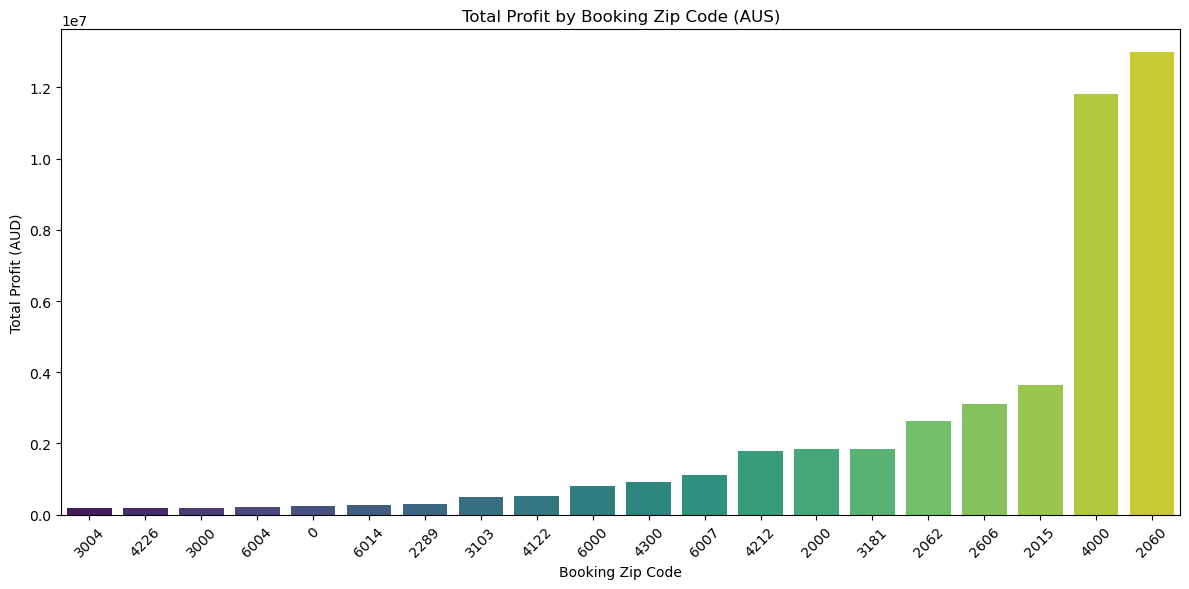

In [104]:
plt.figure(figsize=(12, 6))
sns.barplot(x='BOOKING_TRAVEL_AGENCY_ZIP_CODE', y='PROFIT (AUD)', data=sorted_booking_zip_code_profit.tail(20), 
            palette='viridis', dodge=False)
plt.title('Total Profit by Booking Zip Code (AUS)')
plt.xlabel('Booking Zip Code')
plt.ylabel('Total Profit (AUD)')
plt.xticks(rotation=45)  # Optional: Rotate x-tick labels for better readability
plt.tight_layout()
plt.show()

Now, let's look at profit by customer state.

In [105]:
def zip_code_stringer(zip_code):
    return str(zip_code)

In [106]:
df_AUS['PASSENGER_ZIP_CODE'] = df_AUS['PASSENGER_ZIP_CODE'].apply(zip_code_stringer)

In [107]:
state_codes = {'1': 'NSW', '2': 'NSW', '3': 'VIC', '4': 'QLD', '5': 'SA', '6': 'WA', '7': 'TAS', '8': 'VIC', '9': 'QLD', '0': 'NT'}

In [108]:
state_codes['4']

'QLD'

In [109]:
df_AUS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45056 entries, 0 to 48153
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   PASSENGER_ID                    45056 non-null  int64         
 1   BOOKING_DATE                    45056 non-null  datetime64[ns]
 2   FLIGHT_NUMBER                   45056 non-null  object        
 3   FLIGHT_DEPARTURE_DATE           45056 non-null  datetime64[ns]
 4   PASSENGER_ZIP_CODE              45056 non-null  object        
 5   PASSENGER_COUNTRY_CODE          45056 non-null  object        
 6   AGE                             45056 non-null  float64       
 7   BOOKING_TRAVEL_AGENCY_ZIP_CODE  45056 non-null  object        
 8   AIR_FLIGHT_COMPANY_NAME         45056 non-null  object        
 9   GENDER_CODE                     45056 non-null  object        
 10  PROFIT (AUD)                    45056 non-null  float64       
 11  booking

In [110]:
state_codes[df_AUS['PASSENGER_ZIP_CODE'][0][0]]

'NSW'

In [111]:
passenger_state = []
for x in df_AUS['PASSENGER_ZIP_CODE']:
    passenger_state.append(state_codes[x[0]])
        

In [112]:
df_AUS['passenger_state'] = passenger_state

In [113]:
sorted_profit_by_state = df_AUS.groupby('passenger_state')['PROFIT (AUD)'].sum().sort_values().reset_index()

In [114]:
sorted_profit_by_state

,passenger_state,PROFIT (AUD)
0,NT,6.044435e+02
1,TAS,6.843892e+05
2,SA,3.344218e+06
3,WA,7.971821e+06
4,VIC,8.142878e+06
5,QLD,8.752463e+06
6,NSW,2.584488e+07


In [115]:
(sorted_profit_by_state['PROFIT (AUD)'] / sorted_profit_by_state['PROFIT (AUD)'].sum()) * 100

0     0.001104
1     1.250226
2     6.109137
3    14.562730
4    14.875212
5    15.988787
6    47.212804
Name: PROFIT (AUD), dtype: float64

<Axes: xlabel='passenger_state', ylabel='PROFIT (AUD)'>

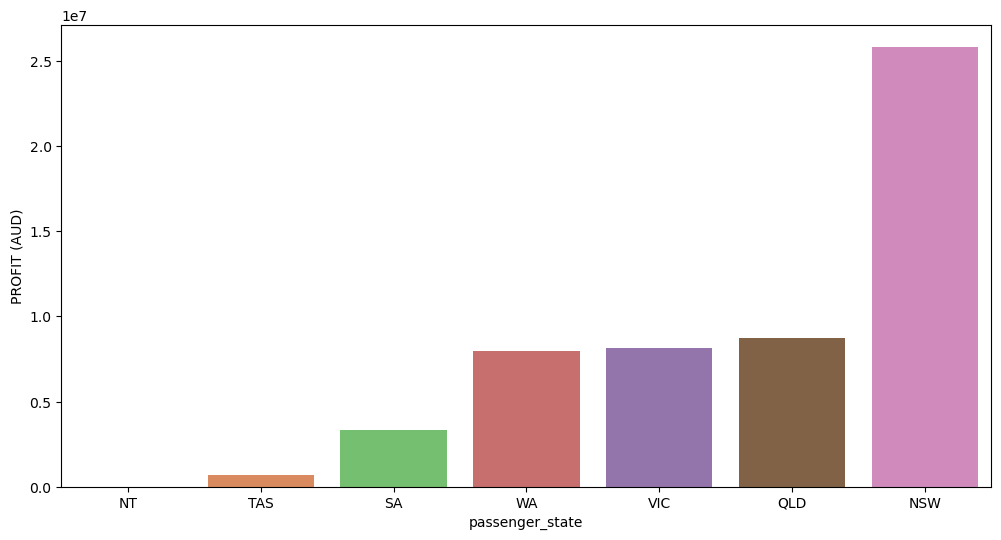

In [116]:
sorted_profit_by_state
plt.figure(figsize=(12, 6))
sns.barplot(x='passenger_state', y='PROFIT (AUD)', data=sorted_profit_by_state, 
            palette='muted', dodge=False)

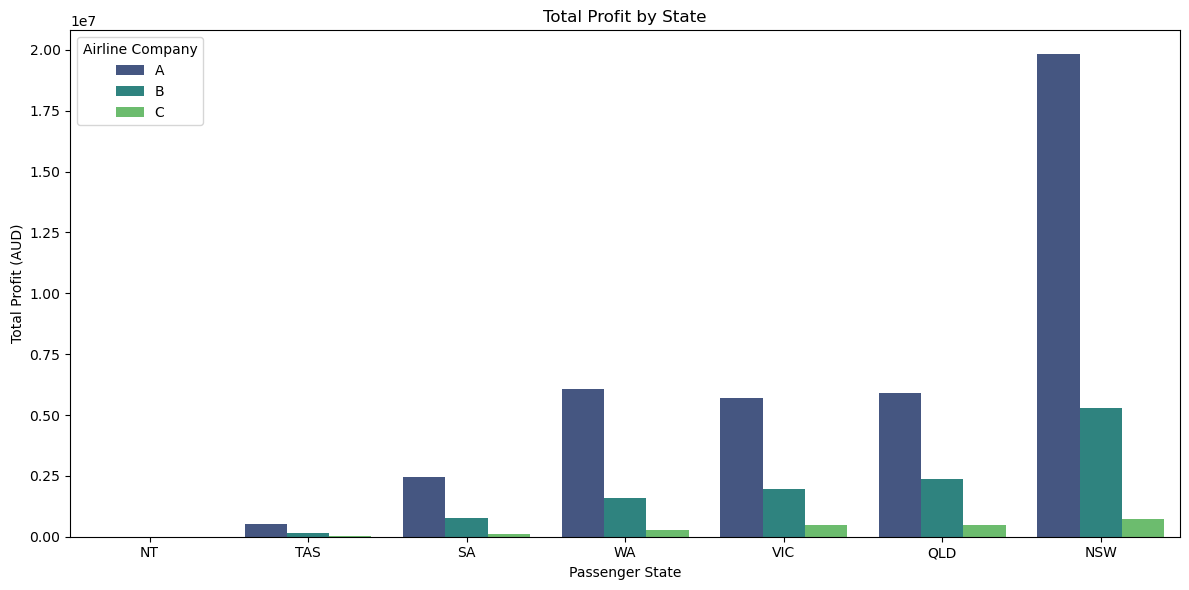

In [117]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_AUS, x='passenger_state', y='PROFIT (AUD)', estimator='sum', errorbar=None,
            order=sorted_profit_by_state['passenger_state'], hue='AIR_FLIGHT_COMPANY_NAME', palette='viridis')
plt.title('Total Profit by State')
plt.xlabel('Passenger State')
plt.ylabel('Total Profit (AUD)')
plt.tight_layout()
plt.legend(title='Airline Company', loc='upper left')

Now lets have a look at gender.

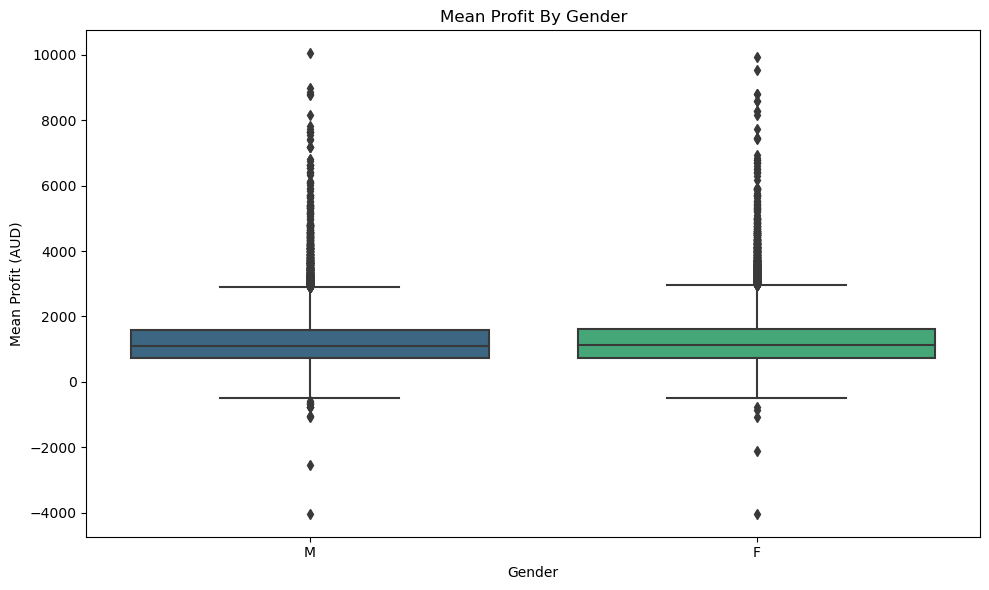

In [118]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='GENDER_CODE', y='PROFIT (AUD)', palette='viridis')

plt.title('Mean Profit By Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Profit (AUD)')
#plt.xticks(rotation=45)  # Optional: Rotate x-tick labels for better readability
plt.tight_layout()
plt.show()

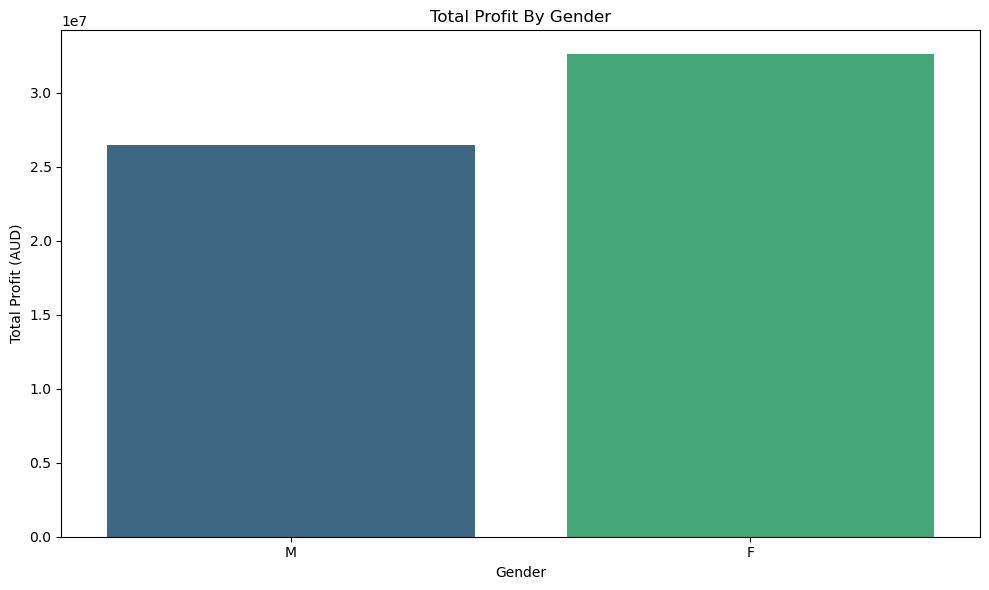

In [119]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df, x='GENDER_CODE', y='PROFIT (AUD)', estimator='sum', errorbar=None, palette='viridis')
plt.title('Total Profit By Gender')
plt.xlabel('Gender')
plt.ylabel('Total Profit (AUD)')
#plt.xticks(rotation=45)  # Optional: Rotate x-tick labels for better readability
plt.tight_layout()
plt.show()

In [120]:
df[df['GENDER_CODE'] == 'M']['PROFIT (AUD)'].sum()/df['PROFIT (AUD)'].sum()

0.4481529482373847

Therefore 45% of total profit is generated by men vs 55% by women.

<Axes: xlabel='passenger_state', ylabel='PROFIT (AUD)'>

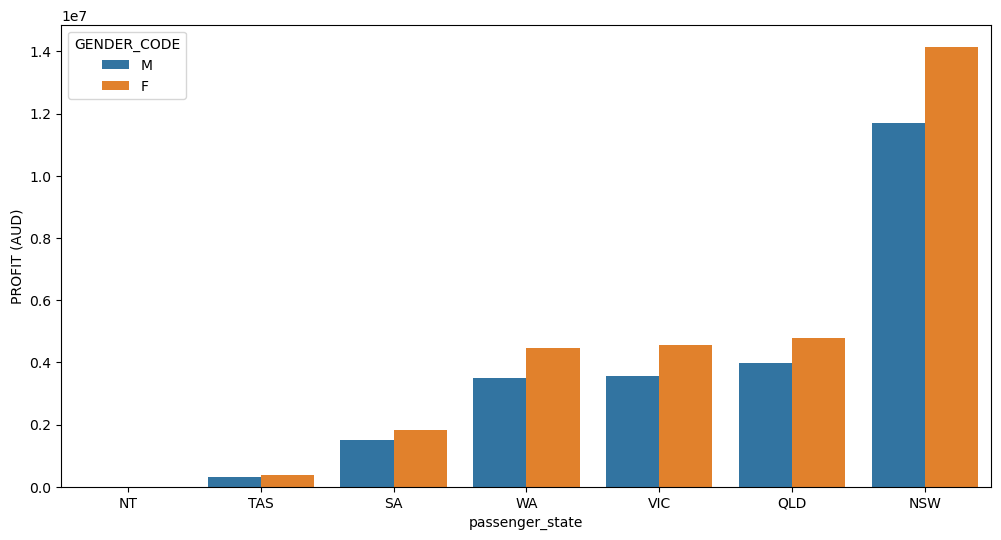

In [121]:
#Looking at gender influence on profit accross states.
plt.figure(figsize=(12, 6))
sns.barplot(data=df_AUS, x='passenger_state', y='PROFIT (AUD)', estimator='sum', errorbar=None,
            order=sorted_profit_by_state['passenger_state'], hue='GENDER_CODE')

Finally, how does customer age affect profit?

In [122]:
df.drop(df[df['AGE'] == 114].index, axis=0, inplace=True)

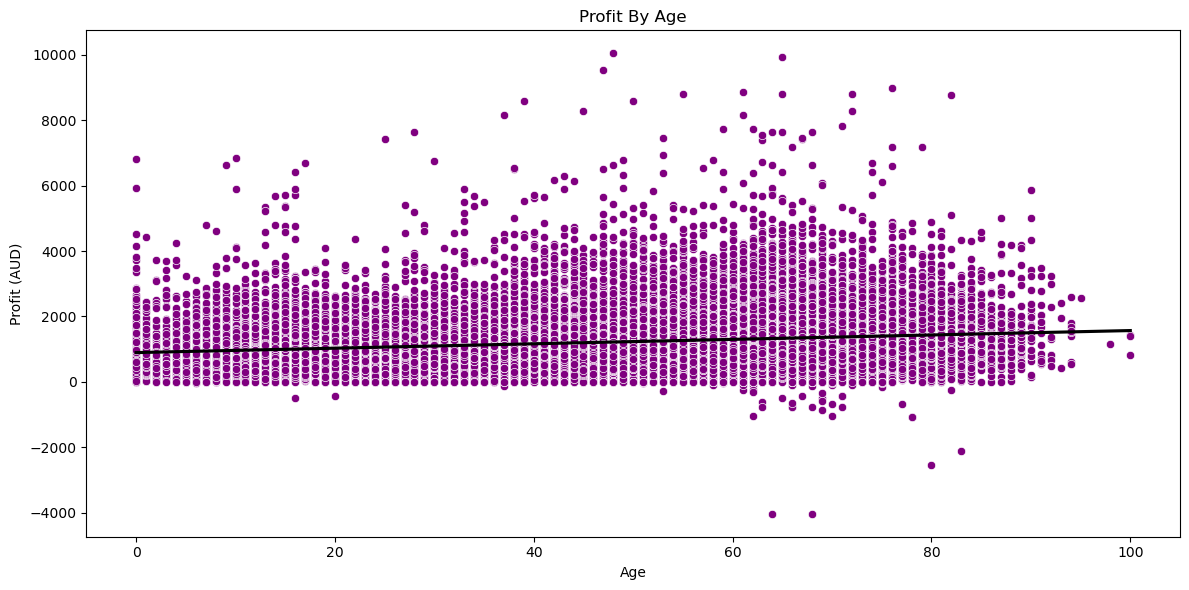

In [123]:
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='AGE', y='PROFIT (AUD)', color='purple')
sns.regplot(data=df, x='AGE', y='PROFIT (AUD)', scatter=False, color='black', line_kws={'label':'Line of Best Fit'})

plt.title('Profit By Age')
plt.xlabel('Age')
plt.ylabel('Profit (AUD)')
#plt.xticks(rotation=45)  # Optional: Rotate x-tick labels for better readability
plt.tight_layout()
plt.show()

# Addressing Question 2
For audience segmentation and targeting purposes, we need to understand what differentiates our brands from each other. Are our different brands attracting the same customers? If not, what makes these customers different? 

First, lets look at shared passengers.

In [124]:
A_passenger_IDs = df[df['AIR_FLIGHT_COMPANY_NAME'] == 'A']['PASSENGER_ID'].values
B_passenger_IDs = df[df['AIR_FLIGHT_COMPANY_NAME'] == 'B']['PASSENGER_ID'].values
C_passenger_IDs = df[df['AIR_FLIGHT_COMPANY_NAME'] == 'C']['PASSENGER_ID'].values

In [125]:
AB_matching_passengers = list(set(A_passenger_IDs) & set(B_passenger_IDs))
AC_matching_passengers = list(set(A_passenger_IDs) & set(C_passenger_IDs))
BC_matching_passengers = list(set(B_passenger_IDs) & set(C_passenger_IDs))

In [126]:
print(len(AB_matching_passengers))
print(len(AC_matching_passengers))
print(len(BC_matching_passengers))

4116
432
111


In [127]:
#Percentage of shared passengers
percentage_shared_passengers = {'AB_matching_passengers_percent_ofA' : len(AB_matching_passengers)/len(A_passenger_IDs),
                                'AB_matching_passengers_percent_ofB' : len(AB_matching_passengers)/len(B_passenger_IDs),
                                'AC_matching_passengers_percent_ofA' : len(AC_matching_passengers)/len(A_passenger_IDs),
                                'AC_matching_passengers_percent_ofC' : len(AC_matching_passengers)/len(C_passenger_IDs),
                                'BC_matching_passengers_percent_ofB' : len(BC_matching_passengers)/len(B_passenger_IDs),
                                'BC_matching_passengers_percent_ofC' : len(BC_matching_passengers)/len(C_passenger_IDs)
                               }

In [128]:
percentage_shared_passengers

{'AB_matching_passengers_percent_ofA': 0.10966057441253264,
 'AB_matching_passengers_percent_ofB': 0.42861605748203685,
 'AC_matching_passengers_percent_ofA': 0.011509564661373688,
 'AC_matching_passengers_percent_ofC': 0.42899702085402186,
 'BC_matching_passengers_percent_ofB': 0.011558887847547642,
 'BC_matching_passengers_percent_ofC': 0.11022840119165839}

Observing gender differences between brands.

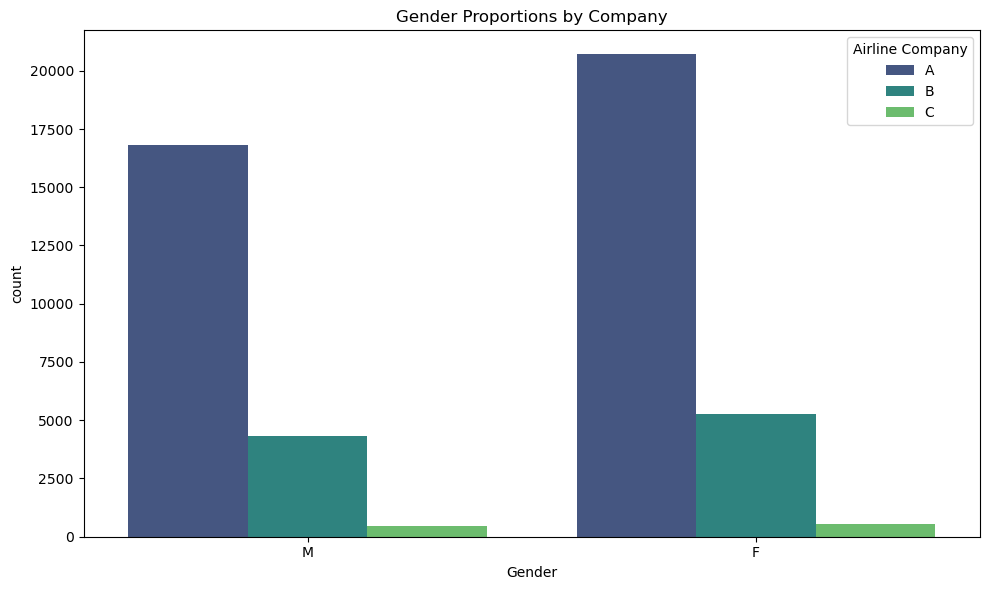

In [129]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='GENDER_CODE', hue='AIR_FLIGHT_COMPANY_NAME', palette='viridis')

plt.title('Gender Proportions by Company')
plt.xlabel('Gender')
plt.tight_layout()
plt.legend(title='Airline Company', loc='upper right')

In [130]:
df[df['AGE'] <= 1]

,PASSENGER_ID,BOOKING_DATE,FLIGHT_NUMBER,FLIGHT_DEPARTURE_DATE,PASSENGER_ZIP_CODE,PASSENGER_COUNTRY_CODE,AGE,BOOKING_TRAVEL_AGENCY_ZIP_CODE,AIR_FLIGHT_COMPANY_NAME,GENDER_CODE,PROFIT (AUD),booking_month
260,474202171,2012-01-03,OG,2012-02-03,2340,AUS,0.0,2060,A,M,370.2400,1
794,495588731,2012-01-08,OC,2012-03-24,2570,AUS,1.0,4000,A,M,396.9400,1
985,509134191,2012-01-09,PD,2012-09-08,6011,AUS,1.0,2062,B,M,866.4684,1
1342,267770129,2012-01-10,OC,2012-12-30,5095,AUS,1.0,4122,A,M,581.3480,1
1985,465979555,2012-01-13,OG,2012-10-23,3023,AUS,1.0,4000,A,M,34.7990,1
...,...,...,...,...,...,...,...,...,...,...,...,...
47524,486713082,2012-12-26,OG,2014-01-23,6722,AUS,1.0,2015,A,F,535.7889,12
47803,267060067,2012-12-28,OC,2013-12-29,0,0,0.0,3058,A,F,1994.7036,12
47856,484406556,2012-12-29,SA,2013-12-18,2903,AUS,0.0,2000,A,M,1502.7917,12
47882,444515454,2012-12-30,SA,2014-03-27,0,0,0.0,6000,A,M,957.9426,12


In [131]:
df.groupby('AIR_FLIGHT_COMPANY_NAME')['GENDER_CODE'].describe()

,count,unique,top,freq
AIR_FLIGHT_COMPANY_NAME,,,,
A,37534,2,F,20700
B,9603,2,F,5279
C,1007,2,F,530


In [132]:
df.groupby('AIR_FLIGHT_COMPANY_NAME')['AGE'].describe()

,count,mean,std,min,25%,50%,75%,max
AIR_FLIGHT_COMPANY_NAME,,,,,,,,
A,37534.0,48.424682,21.208481,0.0,35.0,53.0,65.0,100.0
B,9603.0,53.064147,18.830503,0.0,45.0,57.0,66.0,100.0
C,1007.0,60.334657,15.409526,0.0,55.0,64.0,69.0,90.0


In [133]:
dfAUS_company_grouped = df.groupby('AIR_FLIGHT_COMPANY_NAME')

In [134]:
df_AUS.head()

,PASSENGER_ID,BOOKING_DATE,FLIGHT_NUMBER,FLIGHT_DEPARTURE_DATE,PASSENGER_ZIP_CODE,PASSENGER_COUNTRY_CODE,AGE,BOOKING_TRAVEL_AGENCY_ZIP_CODE,AIR_FLIGHT_COMPANY_NAME,GENDER_CODE,PROFIT (AUD),booking_month,metropolitan_regional,passenger_state
0,290344686,2012-01-01,SA,2013-01-13,2075,AUS,55.0,2022,A,M,2909.7927,1,metropolitan,NSW
1,247630864,2012-01-01,WB,2013-05-04,4118,AUS,48.0,2060,A,F,1119.9226,1,metropolitan,QLD
2,491321871,2012-01-01,SA,2013-01-13,2232,AUS,53.0,2060,A,F,2447.9628,1,metropolitan,NSW
3,443821994,2012-01-01,SA,2013-01-05,2171,AUS,52.0,2606,A,M,1088.3543,1,metropolitan,NSW
4,476584402,2012-01-01,SA,2013-01-05,2171,AUS,18.0,2606,A,M,739.8303,1,metropolitan,NSW


In [135]:
dfAUS_company_grouped['booking_month'].describe()

,count,mean,std,min,25%,50%,75%,max
AIR_FLIGHT_COMPANY_NAME,,,,,,,,
A,37534.0,6.594741,3.502045,1.0,3.0,7.0,10.0,12.0
B,9603.0,6.898261,3.542958,1.0,3.0,8.0,10.0,12.0
C,1007.0,6.903674,3.386862,1.0,4.0,8.0,10.0,12.0


In [136]:
dfAUS_company_grouped['GENDER_CODE'].describe()

,count,unique,top,freq
AIR_FLIGHT_COMPANY_NAME,,,,
A,37534,2,F,20700
B,9603,2,F,5279
C,1007,2,F,530


**Age analysis**

In [137]:
dfAUS_company_grouped['AGE'].mean()

AIR_FLIGHT_COMPANY_NAME
A    48.424682
B    53.064147
C    60.334657
Name: AGE, dtype: float64

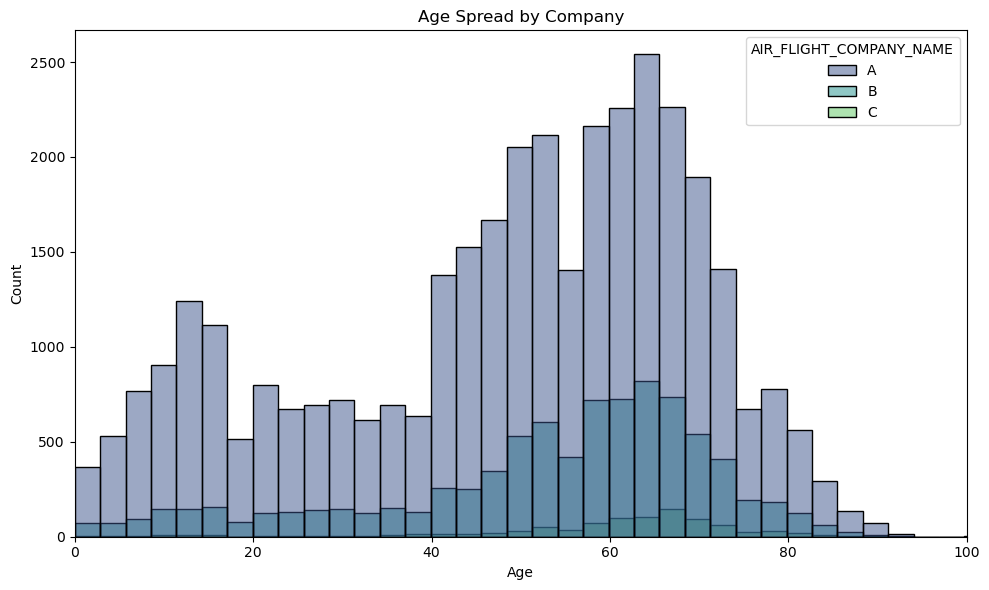

In [138]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df_AUS, x='AGE', hue='AIR_FLIGHT_COMPANY_NAME', bins=40, palette='viridis')

plt.title('Age Spread by Company')
plt.xlabel('Age')
plt.xlim(0, 100)
plt.tight_layout()
#plt.legend(title='Airline Company', loc='upper right')

<Axes: xlabel='AGE', ylabel='Count'>

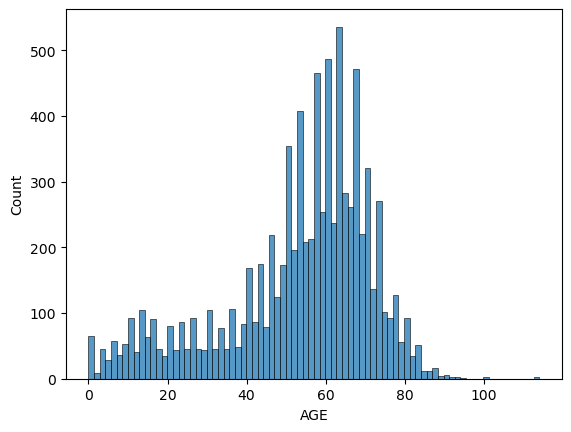

In [139]:
sns.histplot(data=df_AUS[df_AUS['AIR_FLIGHT_COMPANY_NAME'] == 'B'], x='AGE', bins=80)

<Axes: xlabel='AGE', ylabel='Count'>

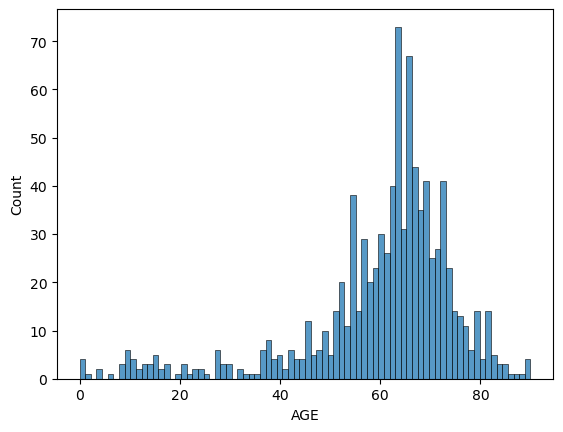

In [140]:
sns.histplot(data=df_AUS[df_AUS['AIR_FLIGHT_COMPANY_NAME'] == 'C'], x='AGE', bins=80)

**Geograhical market analysis**

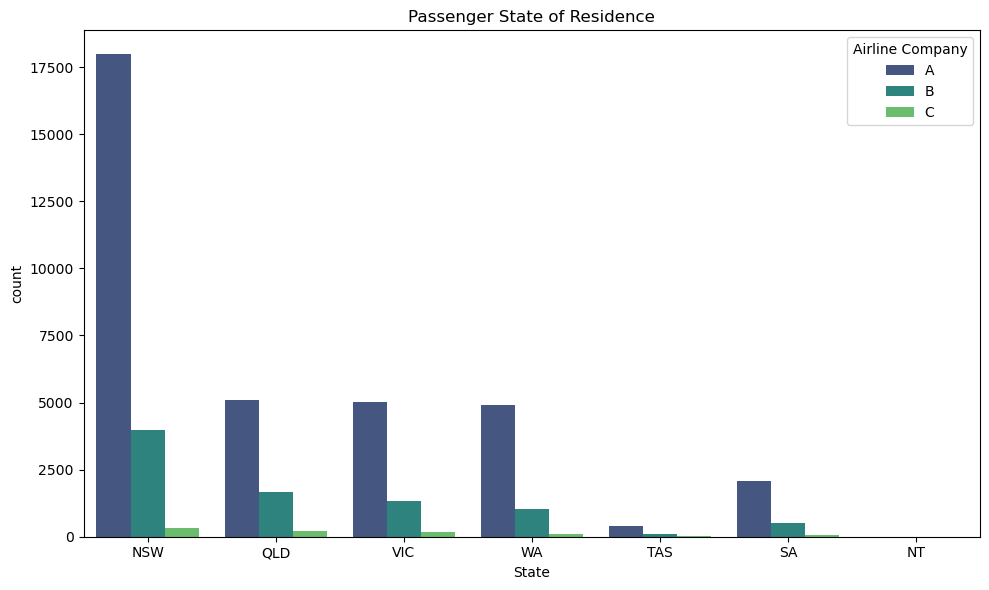

In [141]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_AUS, x='passenger_state', hue='AIR_FLIGHT_COMPANY_NAME', palette='viridis')

plt.title('Passenger State of Residence')
plt.xlabel('State')
plt.tight_layout()
plt.legend(title='Airline Company', loc='upper right')

In [142]:
df_AUS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45056 entries, 0 to 48153
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   PASSENGER_ID                    45056 non-null  int64         
 1   BOOKING_DATE                    45056 non-null  datetime64[ns]
 2   FLIGHT_NUMBER                   45056 non-null  object        
 3   FLIGHT_DEPARTURE_DATE           45056 non-null  datetime64[ns]
 4   PASSENGER_ZIP_CODE              45056 non-null  object        
 5   PASSENGER_COUNTRY_CODE          45056 non-null  object        
 6   AGE                             45056 non-null  float64       
 7   BOOKING_TRAVEL_AGENCY_ZIP_CODE  45056 non-null  object        
 8   AIR_FLIGHT_COMPANY_NAME         45056 non-null  object        
 9   GENDER_CODE                     45056 non-null  object        
 10  PROFIT (AUD)                    45056 non-null  float64       
 11  booking

In [143]:
counts = df_AUS.groupby(['AIR_FLIGHT_COMPANY_NAME', 'metropolitan_regional']).size().reset_index(name='Counts')

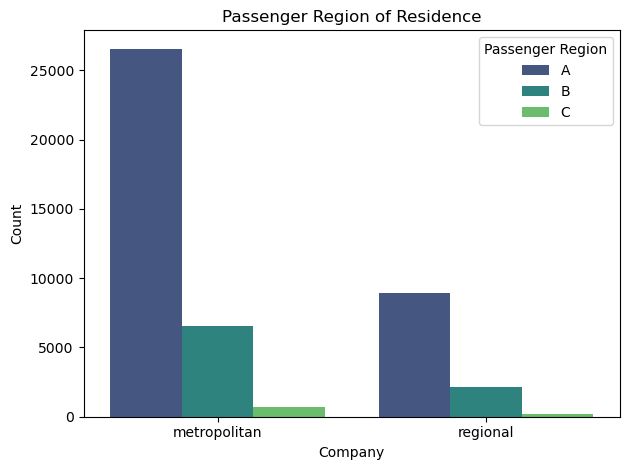

In [144]:
sns.barplot(x='metropolitan_regional', y='Counts', hue='AIR_FLIGHT_COMPANY_NAME', 
            data=counts, errorbar=None, palette='viridis')

plt.title('Passenger Region of Residence')
plt.ylabel('Count')
plt.xlabel('Company')

# Optional: Move the legend outside of the plot
plt.legend(title='Passenger Region', loc='upper right')

# Ensure the plot is displayed
plt.tight_layout()

In [145]:
counts

,AIR_FLIGHT_COMPANY_NAME,metropolitan_regional,Counts
0,A,metropolitan,26567
1,A,regional,8909
2,B,metropolitan,6542
3,B,regional,2129
4,C,metropolitan,688
5,C,regional,221


In [146]:
A_metro_percentage = counts['Counts'][0]/(counts['Counts'][0] + counts['Counts'][1])
B_metro_percentage = counts['Counts'][2]/(counts['Counts'][2] + counts['Counts'][3])
C_metro_percentage = counts['Counts'][4]/(counts['Counts'][4] + counts['Counts'][5])

In [147]:
print(A_metro_percentage)
print(B_metro_percentage)
print(C_metro_percentage)

0.7488724771676627
0.7544689193864607
0.7568756875687569


In [148]:
# Overview of customer number by state and region
df_AUS.groupby(['AIR_FLIGHT_COMPANY_NAME', 'metropolitan_regional', 'passenger_state']).size()

AIR_FLIGHT_COMPANY_NAME  metropolitan_regional  passenger_state
A                        metropolitan           NSW                13589
                                                QLD                 3696
                                                SA                  1550
                                                TAS                  180
                                                VIC                 3532
                                                WA                  4020
                         regional               NSW                 4382
                                                QLD                 1398
                                                SA                   533
                                                TAS                  225
                                                VIC                 1491
                                                WA                   880
B                        metropolitan           NSW         

In [149]:
df_AUS.select_dtypes(include=np.number).corr()

,PASSENGER_ID,AGE,PROFIT (AUD),booking_month
PASSENGER_ID,1.000000,0.006784,-0.001955,-0.005489
AGE,0.006784,1.000000,0.181688,0.010943
PROFIT (AUD),-0.001955,0.181688,1.000000,-0.002058
booking_month,-0.005489,0.010943,-0.002058,1.000000


## Addressing Question 3 ##
The airline group’s board is planning to increase advertising media spend by 20% next year. Based on the current group structure and performance, where should we invest this incremental budget to maximise the overall group’s profitability? 

In [150]:
# Overview of profit by company and state
df_company_state_profit = pd.DataFrame(df_AUS.groupby(['AIR_FLIGHT_COMPANY_NAME', 'passenger_state'])['PROFIT (AUD)'].sum()).reset_index()

In [151]:
df_company_state_profit

,AIR_FLIGHT_COMPANY_NAME,passenger_state,PROFIT (AUD)
0,A,NSW,1.981426e+07
1,A,QLD,5.894099e+06
2,A,SA,2.450385e+06
3,A,TAS,5.047161e+05
4,A,VIC,5.693739e+06
5,A,WA,6.088482e+06
6,B,NSW,5.283834e+06
7,B,NT,6.044435e+02
8,B,QLD,2.376030e+06
9,B,SA,7.763805e+05


In [152]:
df_company_state_profit[df_company_state_profit['AIR_FLIGHT_COMPANY_NAME'] == 'A']['PROFIT (AUD)'].sum()

40445681.4065

In [153]:
company_A_national_profit = df_company_state_profit[df_company_state_profit['AIR_FLIGHT_COMPANY_NAME'] == 'A']['PROFIT (AUD)'].sum()
company_B_national_profit = df_company_state_profit[df_company_state_profit['AIR_FLIGHT_COMPANY_NAME'] == 'B']['PROFIT (AUD)'].sum()
company_C_national_profit = df_company_state_profit[df_company_state_profit['AIR_FLIGHT_COMPANY_NAME'] == 'C']['PROFIT (AUD)'].sum()

In [154]:
df_company_state_profit

,AIR_FLIGHT_COMPANY_NAME,passenger_state,PROFIT (AUD)
0,A,NSW,1.981426e+07
1,A,QLD,5.894099e+06
2,A,SA,2.450385e+06
3,A,TAS,5.047161e+05
4,A,VIC,5.693739e+06
5,A,WA,6.088482e+06
6,B,NSW,5.283834e+06
7,B,NT,6.044435e+02
8,B,QLD,2.376030e+06
9,B,SA,7.763805e+05


In [155]:
list(df_company_state_profit['PROFIT (AUD)'])

[19814260.4956,
 5894098.7543,
 2450385.4245,
 504716.0719,
 5693738.6969,
 6088481.9633,
 5283833.524,
 604.4435,
 2376029.7782,
 776380.4818000001,
 148071.8009,
 1979641.6761,
 1603815.0482,
 746789.2545,
 482334.80580000003,
 117452.4723,
 31601.319000000003,
 469498.1133,
 279524.4449]

In [156]:
profit_state_list = [company_A_national_profit, 19814260.4956,
 5894098.7543,
 2450385.4245,
 504716.0719,
 5693738.6969,
 6088481.9633, company_B_national_profit,
 5283833.524,
 2376029.7782,
 776380.4818000001,
 148071.8009,
 1979641.6761,
 1603815.0482, company_C_national_profit,
 746789.2545,
 482334.80580000003,
 117452.4723,
 469498.1133,
 279524.4449]

In [157]:
profit_state_list

[40445681.4065,
 19814260.4956,
 5894098.7543,
 2450385.4245,
 504716.0719,
 5693738.6969,
 6088481.9633,
 12168376.7527,
 5283833.524,
 2376029.7782,
 776380.4818000001,
 148071.8009,
 1979641.6761,
 1603815.0482,
 2127200.4098,
 746789.2545,
 482334.80580000003,
 117452.4723,
 469498.1133,
 279524.4449]

In [158]:
df_Media_Spend = pd.read_excel('Airline Media Spend.xlsx')

In [159]:
df_Media_Spend.head()

,Category,Company,Market,Media Type,2012-01-01 00:00:00,2012-02-01 00:00:00,2012-03-01 00:00:00,2012-04-01 00:00:00,2012-05-01 00:00:00,2012-06-01 00:00:00,2012-07-01 00:00:00,2012-08-01 00:00:00,2012-09-01 00:00:00,2012-10-01 00:00:00,2012-11-01 00:00:00,2012-12-01 00:00:00,Total Media Spend
0,Airlines,A,National,Magazines,30.0,30.0,10.0,30.0,48.0,48,20.0,5.0,26.0,30,20.0,39.0,336
1,Airlines,A,National,Digital,37.0,32.0,63.0,97.0,213.0,335,17.0,38.0,141.0,298,187.0,97.0,1555
2,Airlines,A,New South Wales,Metropolitan Television,49.0,96.0,231.0,165.0,29.0,277,43.0,17.0,244.0,205,626.0,128.0,2110
3,Airlines,A,New South Wales,Metropolitan Press,NaN,NaN,9.0,25.0,NaN,NaN,NaN,NaN,NaN,57,NaN,NaN,91
4,Airlines,A,New South Wales,Regional Press,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,21


In [160]:
df_Media_Spend = df_Media_Spend[['Company', 'Market', 'Media Type', 'Total Media Spend']]

In [161]:
df_Media_Spend

,Company,Market,Media Type,Total Media Spend
0,A,National,Magazines,336
1,A,National,Digital,1555
2,A,New South Wales,Metropolitan Television,2110
3,A,New South Wales,Metropolitan Press,91
4,A,New South Wales,Regional Press,21
...,...,...,...,...
73,C,Victoria,Metropolitan Television,6
74,C,Victoria,Metropolitan Press,65
75,C,Victoria,Metropolitan Radio,78
76,C,Victoria,Out of Home,10


In [162]:
df_Media_Spend_pivot = df_Media_Spend.pivot_table(index=['Company', 'Market'], columns='Media Type', values='Total Media Spend', aggfunc='sum').reset_index()

In [163]:
#Dropping row 10 as it refers to NT data and has very little info.
df_Media_Spend_pivot = df_Media_Spend_pivot.drop(10)

In [164]:
df_Media_Spend_pivot

Media Type,Company,Market,Cinema,Digital,Magazines,Metropolitan Press,Metropolitan Radio,Metropolitan Television,Out of Home,Regional Press,Regional Television
0,A,National,NaN,1555.0,336.0,NaN,NaN,NaN,NaN,NaN,NaN
1,A,New South Wales,190.0,NaN,NaN,91.0,160.0,2110.0,1783.0,21.0,NaN
2,A,Queensland,150.0,NaN,22.0,42.0,51.0,1046.0,583.0,7.0,NaN
3,A,South Australia,48.0,NaN,NaN,NaN,22.0,586.0,NaN,NaN,NaN
4,A,Tasmania,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,A,Victoria,217.0,NaN,NaN,103.0,82.0,2492.0,142.0,NaN,NaN
6,A,Western Australia,52.0,NaN,NaN,NaN,32.0,716.0,NaN,NaN,NaN
7,B,National,NaN,998.0,1090.0,80.0,NaN,NaN,NaN,NaN,NaN
8,B,New South Wales,50.0,NaN,NaN,148.0,1099.0,1016.0,3271.0,5.0,NaN
9,B,Northern New South Wales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0


In [165]:
df_Media_Spend_pivot.loc[8, 'Regional Television'] = 84

In [166]:
df_Media_Spend_pivot.to_csv('media_spend.csv', index=False)

In [179]:
df_Media_Spend_pivot['PROFIT (AUD)'] = profit_state_list

ValueError: Length of values (20) does not match length of index (22)

I did a bunch of editing of the media spend pivot in excel to incorporate the digital and magazine spends into the states. I operated under the assumption the spend on them in each state was proportional to the state's population.

In [174]:
df_Media_Spend_pivot_mod0 = pd.read_excel('media_spend2.xlsx')

In [175]:
df_Media_Spend_pivot_mod0

,Company,Market,Cinema,Digital,Magazines,Metropolitan Press,Metropolitan Radio,Metropolitan Television,Out of Home,Regional Press,Regional Television,PROFIT (AUD)
0,A,New South Wales,190.000000,514.435030,111.157666,91.0,160.0,2110.0,1783.0,21.0,NaN,1.981426e+07
1,A,Queensland,150.000000,318.276571,90.772301,42.0,51.0,1046.0,583.0,7.0,NaN,5.894099e+06
2,A,South Australia,48.000000,108.349721,23.411901,NaN,22.0,586.0,NaN,NaN,NaN,2.450385e+06
3,A,Tasmania,8.000000,33.639751,7.268782,NaN,NaN,NaN,NaN,NaN,NaN,5.047161e+05
4,A,Victoria,217.000000,397.462443,85.882560,103.0,82.0,2492.0,142.0,NaN,NaN,5.693739e+06
5,A,Western Australia,52.000000,167.734719,36.243644,NaN,32.0,716.0,NaN,NaN,NaN,6.088482e+06
6,B,New South Wales,50.000000,330.164733,360.600761,148.0,1099.0,1016.0,3271.0,5.0,168.0,5.283834e+06
7,B,Queensland,31.000000,204.270108,223.100619,NaN,410.0,460.0,590.0,25.0,43.0,2.376030e+06
8,B,South Australia,NaN,69.538921,75.949322,NaN,91.0,61.0,186.0,NaN,NaN,7.763805e+05
9,B,Tasmania,NaN,21.590014,23.580276,NaN,NaN,NaN,19.0,5.0,NaN,1.480718e+05


In [177]:
df_Media_Spend_pivot_mod0 = df_Media_Spend_pivot_mod0[0:17]

In [176]:
df_Media_Spend_pivot_mod0.fillna(0, inplace=True)

In [178]:
df_Media_Spend_pivot_mod0.select_dtypes(include=np.number).corr()

,Cinema,Digital,Magazines,Metropolitan Press,Metropolitan Radio,Metropolitan Television,Out of Home,Regional Press,Regional Television,PROFIT (AUD)
Cinema,1.000000,0.899201,0.246562,0.530309,0.071093,0.962445,0.324911,0.367581,-0.027887,0.771331
Digital,0.899201,1.000000,0.599269,0.682589,0.413146,0.927451,0.657710,0.561853,0.316219,0.841625
Magazines,0.246562,0.599269,1.000000,0.673609,0.932130,0.356091,0.829322,0.464848,0.807951,0.253584
Metropolitan Press,0.530309,0.682589,0.673609,1.000000,0.706333,0.616924,0.749613,0.149255,0.573667,0.448047
Metropolitan Radio,0.071093,0.413146,0.932130,0.706333,1.000000,0.178816,0.772237,0.259292,0.781796,0.093071
Metropolitan Television,0.962445,0.927451,0.356091,0.616924,0.178816,1.000000,0.441608,0.368331,0.135419,0.791136
Out of Home,0.324911,0.657710,0.829322,0.749613,0.772237,0.441608,1.000000,0.432816,0.848522,0.528768
Regional Press,0.367581,0.561853,0.464848,0.149255,0.259292,0.368331,0.432816,1.000000,0.195838,0.575699
Regional Television,-0.027887,0.316219,0.807951,0.573667,0.781796,0.135419,0.848522,0.195838,1.000000,0.075075
PROFIT (AUD),0.771331,0.841625,0.253584,0.448047,0.093071,0.791136,0.528768,0.575699,0.075075,1.000000


In [180]:
df_Media_Spend_pivot_mod0.select_dtypes(include=np.number).corr()['PROFIT (AUD)'].drop('PROFIT (AUD)').sort_values(ascending=False)

Digital                    0.841625
Metropolitan Television    0.791136
Cinema                     0.771331
Regional Press             0.575699
Out of Home                0.528768
Metropolitan Press         0.448047
Magazines                  0.253584
Metropolitan Radio         0.093071
Regional Television        0.075075
Name: PROFIT (AUD), dtype: float64

In [181]:
correlations = pd.DataFrame(df_Media_Spend_pivot_mod0.select_dtypes(include=np.number).corr()['PROFIT (AUD)'].drop('PROFIT (AUD)').sort_values(ascending=False))

In [182]:
correlations

,PROFIT (AUD)
Digital,0.841625
Metropolitan Television,0.791136
Cinema,0.771331
Regional Press,0.575699
Out of Home,0.528768
Metropolitan Press,0.448047
Magazines,0.253584
Metropolitan Radio,0.093071
Regional Television,0.075075


<Axes: >

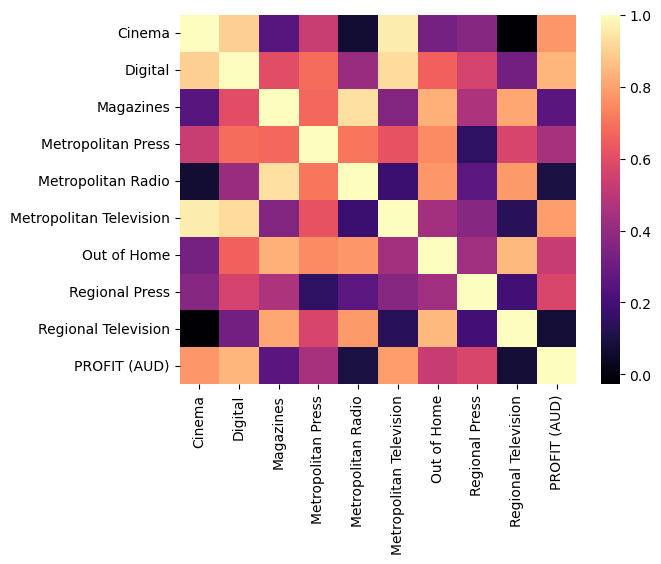

In [183]:
sns.heatmap(data=df_Media_Spend_pivot_mod0.select_dtypes(include=np.number).corr(), cmap= 'magma')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'Regional Television'),
  Text(1.5, 0, 'Metropolitan Radio'),
  Text(2.5, 0, 'Magazines'),
  Text(3.5, 0, 'Metropolitan Press'),
  Text(4.5, 0, 'Out of Home'),
  Text(5.5, 0, 'Regional Press'),
  Text(6.5, 0, 'Cinema'),
  Text(7.5, 0, 'Metropolitan Television'),
  Text(8.5, 0, 'Digital'),
  Text(9.5, 0, 'PROFIT (AUD)')])

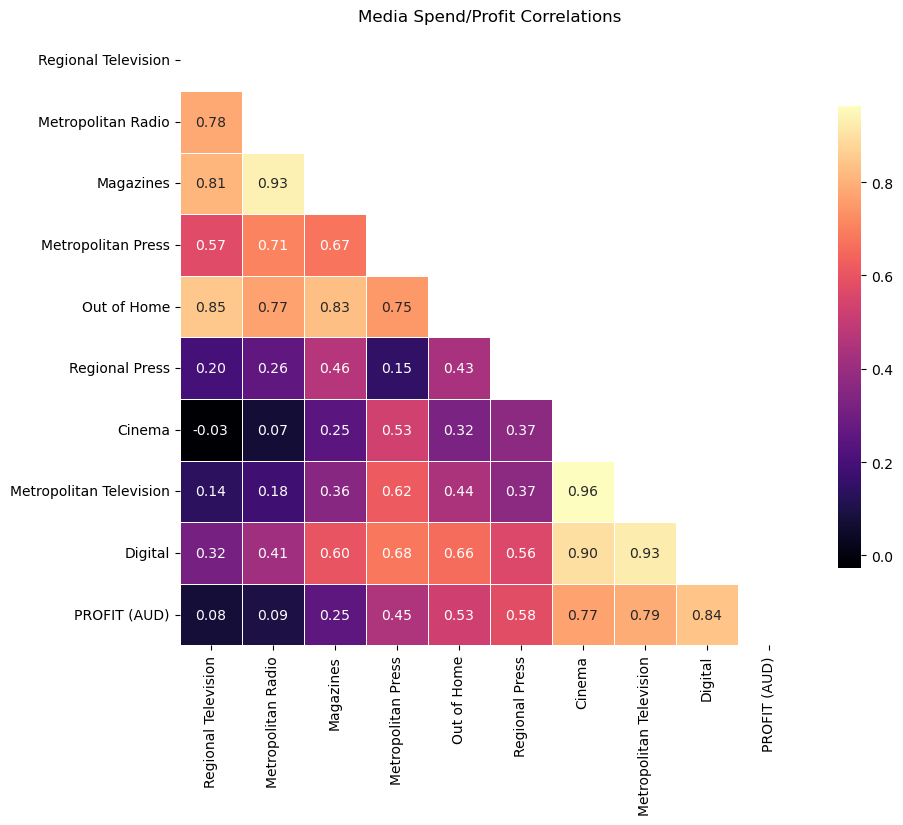

In [184]:
corr = df_Media_Spend_pivot_mod0.select_dtypes(include=np.number).corr()


# Sort columns based on correlation with 'PROFIT'
sorted_columns = corr['PROFIT (AUD)'].sort_values().index  # Sort by correlation values with 'PROFIT'

# Re-arrange the correlation matrix to follow the order of sorted_columns
corr_sorted = corr.reindex(index=sorted_columns, columns=sorted_columns)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_sorted, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with annotations
sns.heatmap(corr_sorted, mask=mask, cmap='magma', annot=True, fmt=".2f", linewidths=.5, cbar_kws={"shrink": 0.75})

# Set the title
plt.title('Media Spend/Profit Correlations')

# Rotate the x-labels for better readability
plt.xticks(rotation=90)

# Display the heatmap
#plt.tight_layout()

In [185]:
X = df_Media_Spend_pivot_mod0.drop(['PROFIT (AUD)','Company', 'Market'], axis=1)  # Drop non-numeric and target columns
y = df_Media_Spend_pivot_mod0['PROFIT (AUD)']

In [186]:
from sklearn.ensemble import RandomForestRegressor

In [187]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extract feature importances
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

print(importance_df.sort_values(by='Importance', ascending=False))

                   Feature  Importance
1                  Digital    0.392115
5  Metropolitan Television    0.359744
0                   Cinema    0.105573
6              Out of Home    0.069588
7           Regional Press    0.032974
8      Regional Television    0.015782
3       Metropolitan Press    0.013271
4       Metropolitan Radio    0.005749
2                Magazines    0.005205


In [188]:
importance_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
1,Digital,0.392115
5,Metropolitan Television,0.359744
0,Cinema,0.105573
6,Out of Home,0.069588
7,Regional Press,0.032974
8,Regional Television,0.015782
3,Metropolitan Press,0.013271
4,Metropolitan Radio,0.005749
2,Magazines,0.005205


Proportion of media spend by state?

In [189]:
df_grouped = pd.DataFrame(df_Media_Spend_pivot_mod0.groupby('Market')['Metropolitan Television'].sum())

total_spend = df_grouped['Metropolitan Television'].sum()

# Create a new column 'percentage_of_total'
df_grouped['percentage_of_total'] = (df_grouped['Metropolitan Television'] / total_profit) * 100

# Sort values by 'PROFIT (AUD)'
df_grouped = df_grouped.sort_values(by='Metropolitan Television')

NameError: name 'total_profit' is not defined

In [190]:
df_grouped

,Metropolitan Television
Market,
New South Wales,3131.0
Queensland,1508.0
South Australia,647.0
Tasmania,0.0
Victoria,3120.0
Western Australia,997.0
